# *Machine Learning*

    Groepsnummer: 8
    Coach: Erik en Vikram 
    Opdrachtnummer: 2
    Namen groepsleden: 
        - Jesse van Leeuwen, 22096337
        - Johan Heskes, 22132376
        - Vince Ammerlaan, 21049599
        - Luca Oldenbeuving 19041527

# <font color='darkgreen'> *Packages , functies en data inladen* <a name = '1'> </a> 

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.ensemble import RandomForestRegressor,VotingRegressor,StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
pd.set_option('display.max_rows', 1000)
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import string
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import t
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.fft import fft
import statsmodels
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.fft import fft, fftfreq

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
count = train['cnt']

#sub = pd.read_csv('sample_submission.csv')

# <font color='darkgreen'> *Opdracht 1 - Exploratieve Data Analyse* <a name = '3'> </a> 

Om uberhaupt te voldoen voor machine learning, moeten het dataframe zijn, geen missende waardes en alles moet een int of float zijn. 

## <font color='darkgreen'> Basisstatistieken  <a name = '2.2'></a>

In [3]:
train.head()


,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0,1


We hebben in de train dataset de volgende features:
- **date_hour**: Je hebt informatie over de periode van 1-1-2011 t/m 30-11-2012
- **holiday**: vakantie
- **weathersit**:
  - 1: Helder, licht bewolkt, deels bewolkt
  - 2: Mistig , mistig en licht bewolkt
  - 3: Lichte sneeuw, lichte regen, lichte regen en onweer, zwaar bewolkt, lichte regen en zwaar bewolkt
  - 4: Zware regen,  hagel,  zware mist, sneeuw.
- **temp**: genormaliseerde temperatuur in Celsius
- **atemp**: "gevoelstemperatuur" in Celsius
- **hum**: genormaliseerde luchtvochtigheid
- **windspeed**: windsnelheid
- **cnt**: aantal totale verhuringen

In [4]:
train.shape

(16637, 8)

In [5]:
train.isnull().sum()

date_hour     0
holiday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [6]:
train.describe()

,holiday,weathersit,temp,atemp,hum,windspeed,cnt
count,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000
mean,0.028671,1.415580,0.504745,0.482608,0.624756,0.190310,190.477009
std,0.166885,0.637298,0.192369,0.171557,0.193227,0.121915,182.026755
min,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,41.000000
50%,0.000000,1.000000,0.520000,0.500000,0.620000,0.194000,143.000000
75%,0.000000,2.000000,0.660000,0.621200,0.780000,0.253700,282.000000
max,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [7]:
test.head()

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed
0,2012-12-01 00:00:00,0,1,0.26,0.3030,0.81,0.0000
1,2012-12-01 01:00:00,0,1,0.26,0.3030,0.81,0.0000
2,2012-12-01 02:00:00,0,2,0.26,0.3030,0.81,0.0000
3,2012-12-01 03:00:00,0,2,0.26,0.2727,0.81,0.1343
4,2012-12-01 04:00:00,0,1,0.26,0.2879,0.81,0.0896


#### Converting date column

In [8]:
train['date_hour'] = pd.to_datetime(train['date_hour'])

In [9]:
# Haal het jaar uit de 'date_hour'-kolom en maak een nieuwe kolom 'year' aan
train['year'] = train['date_hour'].dt.year

# Haal de maand als naam uit de 'date_hour'-kolom en maak een nieuwe kolom 'month' aan
train['month'] = train['date_hour'].dt.month_name()

# Haal de dag als naam uit de 'date_hour'-kolom en maak een nieuwe kolom 'day' aan
train['day'] = train['date_hour'].dt.day_name()

# Haal het uur uit de 'date_hour'-kolom en maak een nieuwe kolom 'hour' aan
train['hour'] = train['date_hour'].dt.hour

train.head()

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,day,hour
0,2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0,16,2011,January,Saturday,0
1,2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0,40,2011,January,Saturday,1
2,2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0,32,2011,January,Saturday,2
3,2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0,13,2011,January,Saturday,3
4,2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0,1,2011,January,Saturday,4


In [10]:
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Fall'
    else:
        return 'Unknown'

Om inzicht te krijgen in verschil in seizoenen, hebben we Season toegevoegd. (Python: Datetime to Season, z.d.)

In [11]:
train['season'] = train['month'].apply(get_season)

# Toon de eerste paar rijen van het resulterende DataFrame.
print(train.head())

            date_hour  holiday  weathersit  temp   atemp   hum  windspeed  \
0 2011-01-01 00:00:00        0           1  0.24  0.2879  0.81        0.0   
1 2011-01-01 01:00:00        0           1  0.22  0.2727  0.80        0.0   
2 2011-01-01 02:00:00        0           1  0.22  0.2727  0.80        0.0   
3 2011-01-01 03:00:00        0           1  0.24  0.2879  0.75        0.0   
4 2011-01-01 04:00:00        0           1  0.24  0.2879  0.75        0.0   

   cnt  year    month       day  hour  season  
0   16  2011  January  Saturday     0  Winter  
1   40  2011  January  Saturday     1  Winter  
2   32  2011  January  Saturday     2  Winter  
3   13  2011  January  Saturday     3  Winter  
4    1  2011  January  Saturday     4  Winter  


Om het dataset verder te ontleden en te begrijpen, is de date_hour variabele zorgvuldig opgesplitst. Deze opdeling omvat het extraheren van verschillende tijdscomponenten, namelijk het jaar, de maand, de dag en het uur, uit de datetime kolom. Het resultaat is een meer gestructureerde weergave van tijdsgerelateerde gegevens die het analyseren, visualiseren en begrijpen van patronen in verhuur makkelijker maken. Het geeft een soepelere manier om de gegevens te bekijken en te begrijpen.

In [12]:
# Vervang de waarden in de 'holiday'-kolom door bijbehorende tekstreeksen.
train['holiday'].replace({1: 'Holiday', 0: 'Not Holiday'}, inplace=True)

# Vervang de waarden in de 'weather'-kolom door bijbehorende tekstreeksen.
train['weathersit'].replace({1: 'Clear', 2: 'Mist', 3: 'Rain', 4: 'Snow'}, inplace=True)

In [13]:
train.head()
sarm = train.copy()

De dataset is nu al veel makkelijker te begrijpen en te ontleden. Vervolgens voeren we stappen uit om de categoriale variabelen te ontleden.

In [14]:
categorical_features = train[['holiday','weathersit','season',  'year', 'month', 'day', 'hour']]

for i in categorical_features:
    print(train[i].value_counts())
    print('-' * 50)

Not Holiday    16160
Holiday          477
Name: holiday, dtype: int64
--------------------------------------------------
Clear    11078
Mist      4207
Rain      1349
Snow         3
Name: weathersit, dtype: int64
--------------------------------------------------
Summer    4403
Spring    4398
Fall      4325
Winter    3511
Name: season, dtype: int64
--------------------------------------------------
2011    8645
2012    7992
Name: year, dtype: int64
--------------------------------------------------
May          1488
July         1488
August       1475
March        1473
October      1451
June         1440
April        1437
September    1437
November     1437
January      1429
February     1341
December      741
Name: month, dtype: int64
--------------------------------------------------
Saturday     2392
Friday       2391
Sunday       2382
Wednesday    2379
Thursday     2375
Monday       2360
Tuesday      2358
Name: day, dtype: int64
--------------------------------------------------
17 

Uit dit stukje code kunnen we het volgende afleiden:
- Er zijn erg weinig gevallen van sneeuw bij de variabele weathersit. Dit zou kunnen leiden tot negatieve gevolgen in onze analyse. Deze combineren we hierdoor met de categorie 'Rain'.
- Bij de dagen zien we de hoogste aantallen in het weekend. Daarom maken we nog een categorie genaamd weekend en werkdag.

In [15]:
mask = {"Snow" : "Rain"}

train['weathersit'] = train['weathersit'].replace(mask)

train['weathersit'].value_counts()

Clear    11078
Mist      4207
Rain      1352
Name: weathersit, dtype: int64

*Bron: Data 1 (Les van Mask)*

In [16]:
weekend = train[(train['day'] == 'Saturday') & (train['day'] == 'Sunday')]

Vervolgens kijken we ook naar de numerieke waarden voor betere begrip van de data.

In [17]:
# Numerieke columns.
numerical_features = train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

# calculate descriptive statistics for numerical values.
numerical_features.describe()


,temp,atemp,hum,windspeed,cnt
count,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000
mean,0.504745,0.482608,0.624756,0.190310,190.477009
std,0.192369,0.171557,0.193227,0.121915,182.026755
min,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.470000,0.104500,41.000000
50%,0.520000,0.500000,0.620000,0.194000,143.000000
75%,0.660000,0.621200,0.780000,0.253700,282.000000
max,1.000000,1.000000,1.000000,0.850700,977.000000


We zien gelijk een probleem met hum en windspeed. Deze variabelen hebben beide een minimum van 0, wat onmogelijk is. Als oplossing gaan we deze nul waarden vervangen met logische waardes.

In [18]:
# Nu zoomen we in op hum.
min_1 = train[train['hum'] == 0]

min_1

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,day,hour,season
1551,2011-03-10 00:00:00,Not Holiday,Rain,0.34,0.3182,0.0,0.2537,3,2011,March,Thursday,0,Spring
1552,2011-03-10 01:00:00,Not Holiday,Rain,0.34,0.3182,0.0,0.2537,2,2011,March,Thursday,1,Spring
1553,2011-03-10 02:00:00,Not Holiday,Rain,0.34,0.3182,0.0,0.2537,1,2011,March,Thursday,2,Spring
1554,2011-03-10 05:00:00,Not Holiday,Rain,0.36,0.3485,0.0,0.1940,3,2011,March,Thursday,5,Spring
1555,2011-03-10 06:00:00,Not Holiday,Rain,0.36,0.3333,0.0,0.3284,12,2011,March,Thursday,6,Spring
1556,2011-03-10 07:00:00,Not Holiday,Rain,0.38,0.3939,0.0,0.2239,37,2011,March,Thursday,7,Spring
1557,2011-03-10 08:00:00,Not Holiday,Rain,0.38,0.3939,0.0,0.2836,44,2011,March,Thursday,8,Spring
1558,2011-03-10 09:00:00,Not Holiday,Rain,0.40,0.4091,0.0,0.2239,24,2011,March,Thursday,9,Spring
1559,2011-03-10 10:00:00,Not Holiday,Rain,0.40,0.4091,0.0,0.1642,17,2011,March,Thursday,10,Spring
1560,2011-03-10 11:00:00,Not Holiday,Rain,0.40,0.4091,0.0,0.2537,11,2011,March,Thursday,11,Spring


We zien 21 keer dat de hum 0 is. Wat erg interessant is, is dat deze allemaal op dezelfde dag zijn opgemeten. Dit kan dus een fout zijn in de opmeting van data op 10 Maart. Om dit te herstellen zullen we hum vullen met de gemiddelde hum waarden waar de weathersit Rain was. We zien namelijk vooral Rain bij weathersit voor deze gevallen.

In [19]:
regen = train[train['weathersit'] == 'Rain']
gem_weer = regen['hum'].mean()


train['hum'] = train['hum'].replace(0, gem_weer)
train['hum'].min()

0.08

Nu we de humiditeit hebben opgelost, kijken we naar de gevallen waar windspeed 0 was.

In [20]:
min_waarde = train[train['windspeed']==0].shape[0]

min_waarde

2072

In [21]:
min_rows = train[train['windspeed'] == 0]

min_rows.sample(10)

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,day,hour,season
7258,2011-11-04 01:00:00,Not Holiday,Mist,0.40,0.4091,0.82,0.0,17,2011,November,Friday,1,Fall
3167,2011-05-16 21:00:00,Not Holiday,Clear,0.58,0.5455,0.83,0.0,177,2011,May,Monday,21,Spring
4539,2011-07-13 01:00:00,Not Holiday,Clear,0.76,0.6970,0.55,0.0,12,2011,July,Wednesday,1,Summer
9597,2012-02-09 20:00:00,Not Holiday,Clear,0.32,0.3485,0.36,0.0,199,2012,February,Thursday,20,Winter
15647,2012-10-19 04:00:00,Not Holiday,Mist,0.56,0.5303,0.83,0.0,6,2012,October,Friday,4,Fall
7259,2011-11-04 02:00:00,Not Holiday,Mist,0.40,0.4091,0.76,0.0,10,2011,November,Friday,2,Fall
3056,2011-05-12 06:00:00,Not Holiday,Clear,0.44,0.4394,0.88,0.0,112,2011,May,Thursday,6,Spring
14857,2012-09-16 06:00:00,Not Holiday,Clear,0.50,0.4848,0.72,0.0,35,2012,September,Sunday,6,Fall
4471,2011-07-10 05:00:00,Not Holiday,Clear,0.66,0.6212,0.74,0.0,17,2011,July,Sunday,5,Summer
15697,2012-10-21 06:00:00,Not Holiday,Clear,0.40,0.4091,0.62,0.0,26,2012,October,Sunday,6,Fall


We zien 2072 waarnemingen waar windspeed 0 was. Deze vullen we met de waardes die niet 0 zijn.

In [22]:
train['windspeed'] = train['windspeed'].replace(0, method='ffill').replace(0, method='bfill')

train['windspeed'].min()

0.0896

In [23]:
# Bron

## Data visualisatie

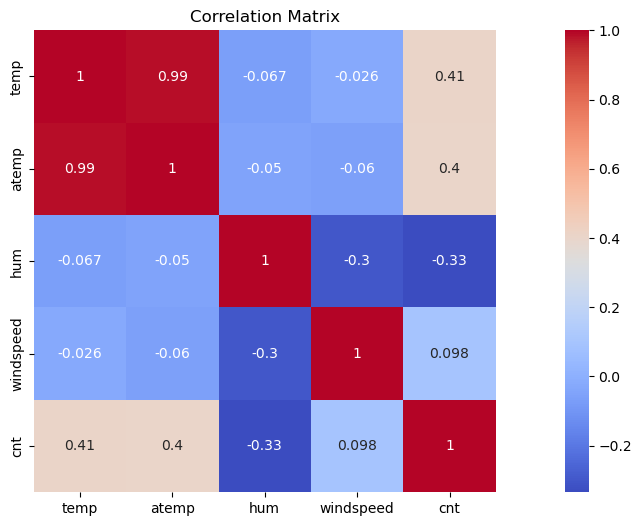

In [24]:
correlation_matrix = train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Zoals we hebben gezien in de bovenstaande grafiek, (How to create a correlation matrix using pandas, 2023)

1- Er is een sterke correlatie tussen de kolom 'temp' en de kolom 'atemp', dus we verwijderen er een van omdat beide kenmerken als één functie werken.

2- Er is een zwakke positieve correlatie tussen de kolom 'temp' en het doel 'count' (0.4), een zwakke negatieve correlatie tussen de kolom 'humidity' en het doel (-0.33), maar er is geen correlatie tussen windspeed en cnt(0.098).

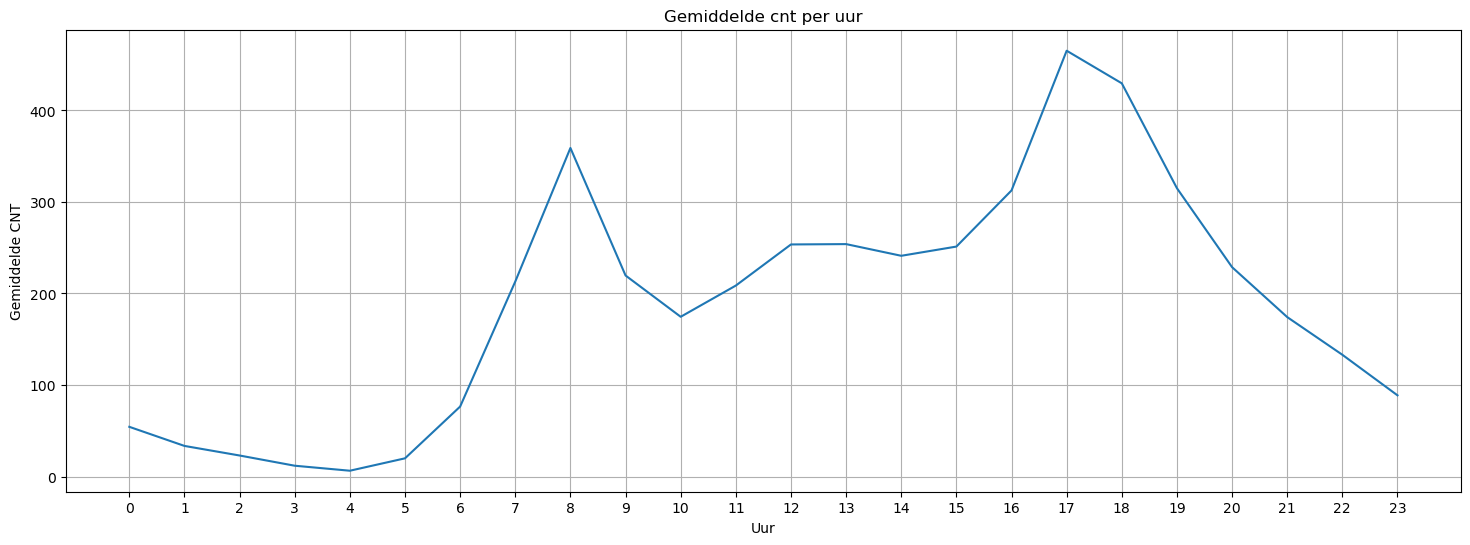

In [25]:

# Calculate the average rental counts by hour of the day
countpuur= train.groupby('hour')['cnt'].mean().reset_index()

# Create a line plot to visualize the average rental counts by hour
plt.figure(figsize=(18, 6))
sns.lineplot(x='hour', y='cnt', data=countpuur)
plt.xlabel('Uur')
plt.ylabel('Gemiddelde CNT')
plt.title('Gemiddelde cnt per uur')
plt.xticks(ticks=range(24), labels=range(24))
plt.grid()
plt.show()

Uit de grafiek hierboven (Gemiddelde cnt per uur) valt te lezen dat er pieken zijn in de count bij de tijden 8:00 en 17:00. Dit is waarschijnlijk te verklaren doordat dit spitstijden zijn. Om te controleren of dit inderdaad komt door de spitsuren, kunnen we kijken naar de gemiddelde count per uur per dag. Dit zal laten zien of 8:00 en 17:00 inderdaad pieken door de spits van mensen die naar school of werk gaan en terug of dat het in het weekend ook zo is en dus waarschijnlijk een andere reden heeft.

Text(0.5, 1.0, 'Gemiddelde cnt per uur per dag')

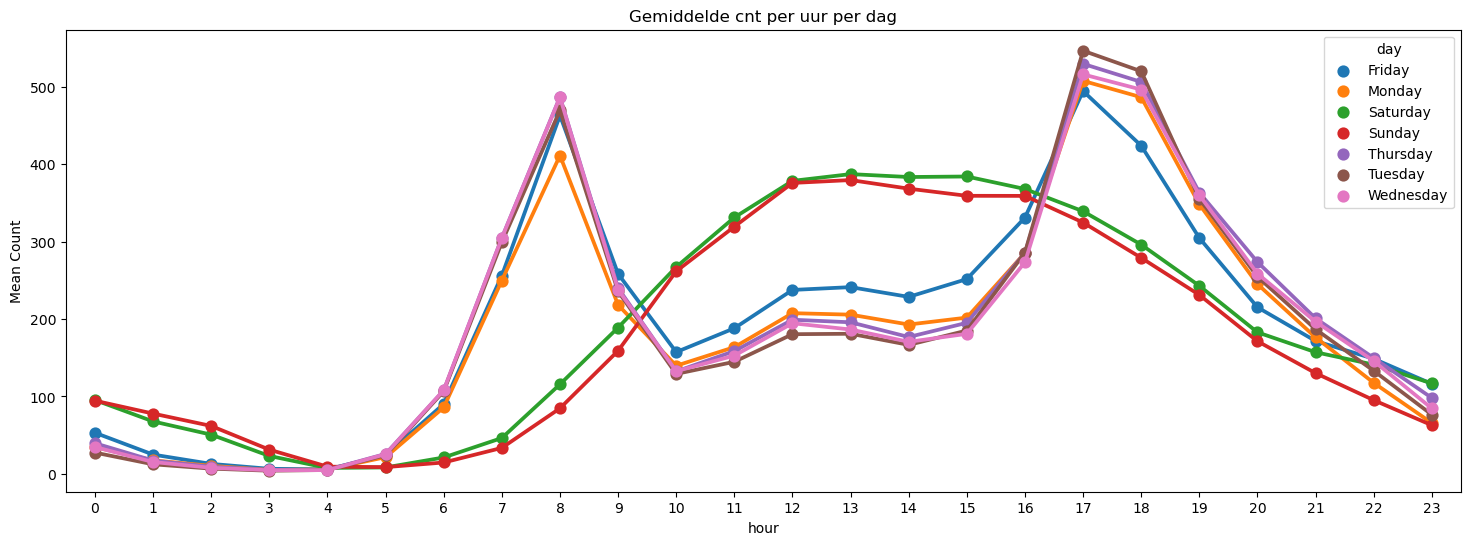

In [26]:
plt.figure(figsize=(18, 6))
hour_day_df = train.groupby(["hour", "day"])["cnt"].mean().to_frame().reset_index()
ax1 = sns.pointplot(x=hour_day_df["hour"], y=hour_day_df["cnt"], hue=hour_day_df["day"])
ax1.set_ylabel("Mean Count")
plt.title('Gemiddelde cnt per uur per dag')

De grafiek hierboven (Gemiddelde cnt per uur per dag) laat zien dat alle doordeweekse dagen pieken op 8:00 en 17:00 en dat zaterdag en zondag dit niet doen. Zaterdag en Zondag hebben hun hoogtepunt rond 12:00 en 13:00. Hieruit kunnen we concluderen dat de pieken op 8:00 en 17:00 waarschijnlijk met de spits te maken hebben zoals we bij de grafiek "de gemiddelde cnt per uur" al dachten.

markdown

Text(0, 0.5, 'Mean Count')

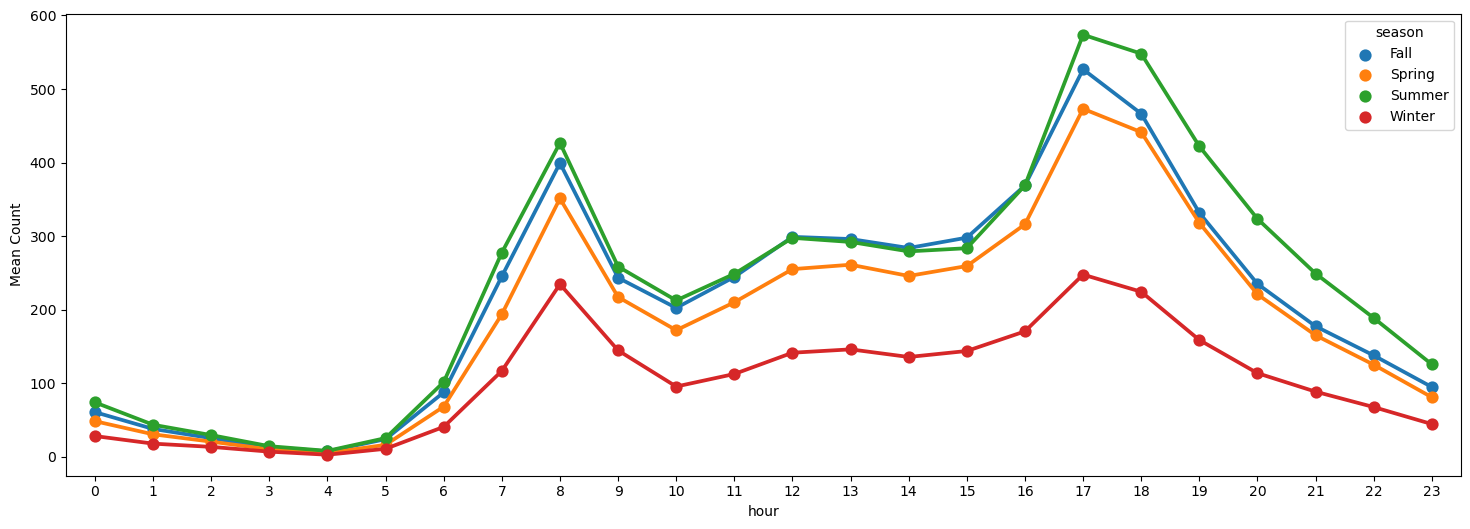

In [27]:
plt.figure(figsize=(18, 6))
hour_season_df = train.groupby(["hour", "season"])["cnt"].mean().to_frame().reset_index()
ax2 = sns.pointplot(x=hour_season_df["hour"], y=hour_season_df["cnt"], hue=hour_season_df["season"])
ax2.set_ylabel("Mean Count")

De grafiek hierboven laat zien dat de count lager is in de winter en dat de zomer de hoogste count heeft. Waarschijnlijk heeft dit te maken met de lagere temperatuur in de winter en de hogere temperatuur in de zomer. Deze voorspelling kunnen we controleren door de temperaturen in de seizoenen met elkaar te vergelijken.

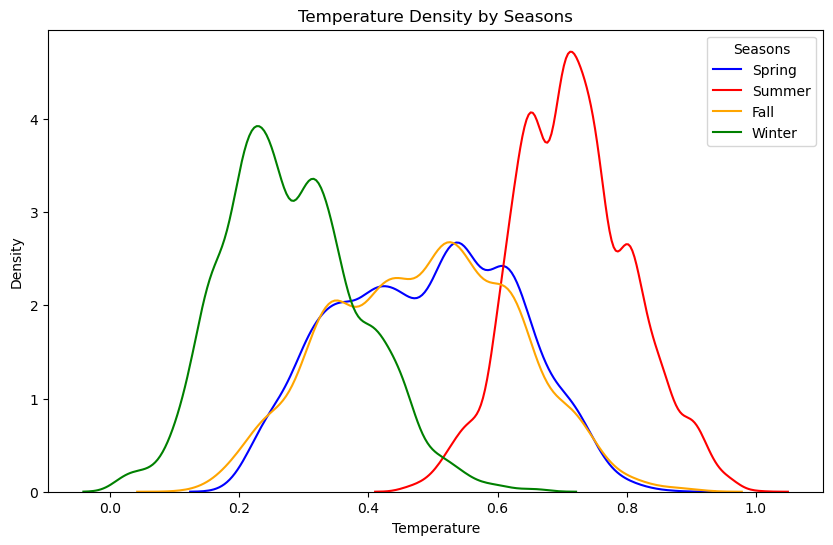

In [28]:
# Define custom colors for each season
season_colors = {
    'Spring': 'green',
    'Summer': 'orange',
    'Fall': 'red',
    'Winter': 'blue'
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a kernel density plot of temperature by season with custom colors
sns.kdeplot(data=train, x='temp', hue='season', common_norm=False, palette=season_colors.values())
plt.title('Temperature Density by Seasons')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.legend(title='Seasons', labels=season_colors.keys())

plt.show()

De grafiek hierboven (Temperature Density by Seasons) laat zien dat er meer lage temperaturen voorkomen in de winter, dat er meer hoge temperaturen voorkomen in de zomer en dat daartussen de temperaturen in de lente en herfst vallen. Dit komt overeen met de grafiek van de count per seizoen, waarin de winter de laagste count had en de zomer de hoogste en de lente en herfst en tussen in zaten.

Samenvatting van de belangrijkste bevindingen:

De belangrijkste bevinding is dat er een duidelijke seizoensgebonden trend zichtbaar is in het aantal verhuren over de tijd. Dit is vooral zichtbaar in de grafiek die de count per seizoen weergeeft. Verder kan je in de heatmap de correlaties zien tussen de ‘cnt’ kolom en de andere kolommen. Hierin is te zien dat de hoogste positieve correlatie met de kolom ‘temp’ is en de hoogste negatieve correlatie met de kolom ‘hum’ is. De correlatie van ‘temp’ is de sterkste correlatie met ‘cnt’ van alle kolommen.

De count is het laagste in de winter en het hoogste in de zomer. Dit komt door de correlatie tussen temperatuur van deze seizoenen en de count.

Verder Is er ook nog een weekelijks patroon gevonden. Tijdens werkdagen is de count het hoogst op spitsuren en in het weekend in het begin van de middag.

Hier zien we de verdeling van temperatuur densiteit tegen seizoenen. We zien dat het in de zomer vaak warmer is, en in de winter vaak kouder.

**Samenvatting van de belangrijkste bevindingen**:

Er is een duidelijke seizoensgebonden trend zichtbaar in het aantal verhuren over de tijd.

Waar te zien: Dit kan worden waargenomen in de tijdserie-plot van de 'cnt' kolom, waar seizoensgebonden pieken en dalen in het aantal verhuren zichtbaar zijn.

De temperatuur (zowel werkelijk als voelbaar) heeft een positieve correlatie met het aantal verhuren. Dit betekent dat bij hogere temperaturen het aantal verhuren toeneemt.Waar te zien: Dit is zichtbaar in de scatterplots van 'temp' en 'atemp' tegen 'cnt'. De punten laten een opwaartse trend zien, wat wijst op een positieve relatie.


Vochtigheid en windsnelheid lijken een enigszins negatieve correlatie te hebben met het aantal verhuren, hoewel deze relaties minder sterk zijn. Waar te zien: In de scatterplots van 'hum' en 'windspeed' tegen 'cnt' is er enige neerwaartse trend, hoewel de punten meer verspreid zijn, wat duidt op een zwakkere relatie.

## 2: Time series feature engineering 

Om te beginnen met Time series feature engineering, hebben we een dataset nodig met alleen datum en de target kolomn.

In [29]:
train1 = train[['date_hour', 'cnt']].set_index('date_hour')
train1.sort_index(inplace=True)


<AxesSubplot:xlabel='date_hour'>

<Figure size 2000x1000 with 0 Axes>

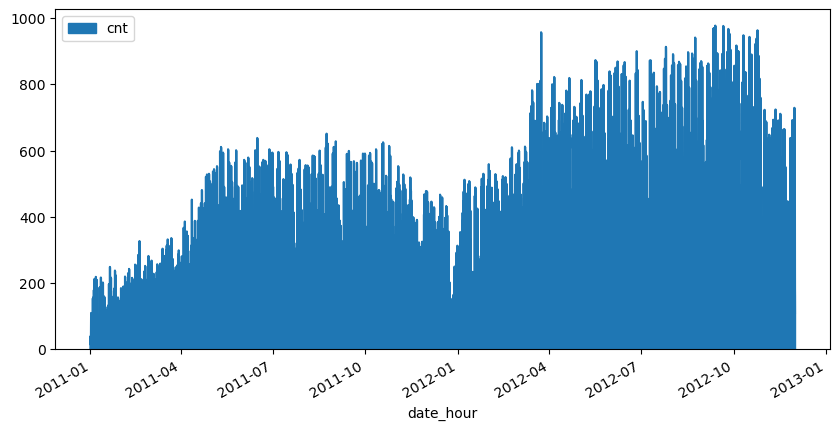

In [30]:
plt.figure(figsize=(20,10))
train1.plot(y='cnt', kind='area',figsize=(10, 5))


We zien een stabiele groei tussen 2011 en 2012. Echter zien we een dip bij 2012-01/02. Dit kan worden verklaard door de lage verhuuraantallen in de Winter. Dit is ook besproken in de EDA.

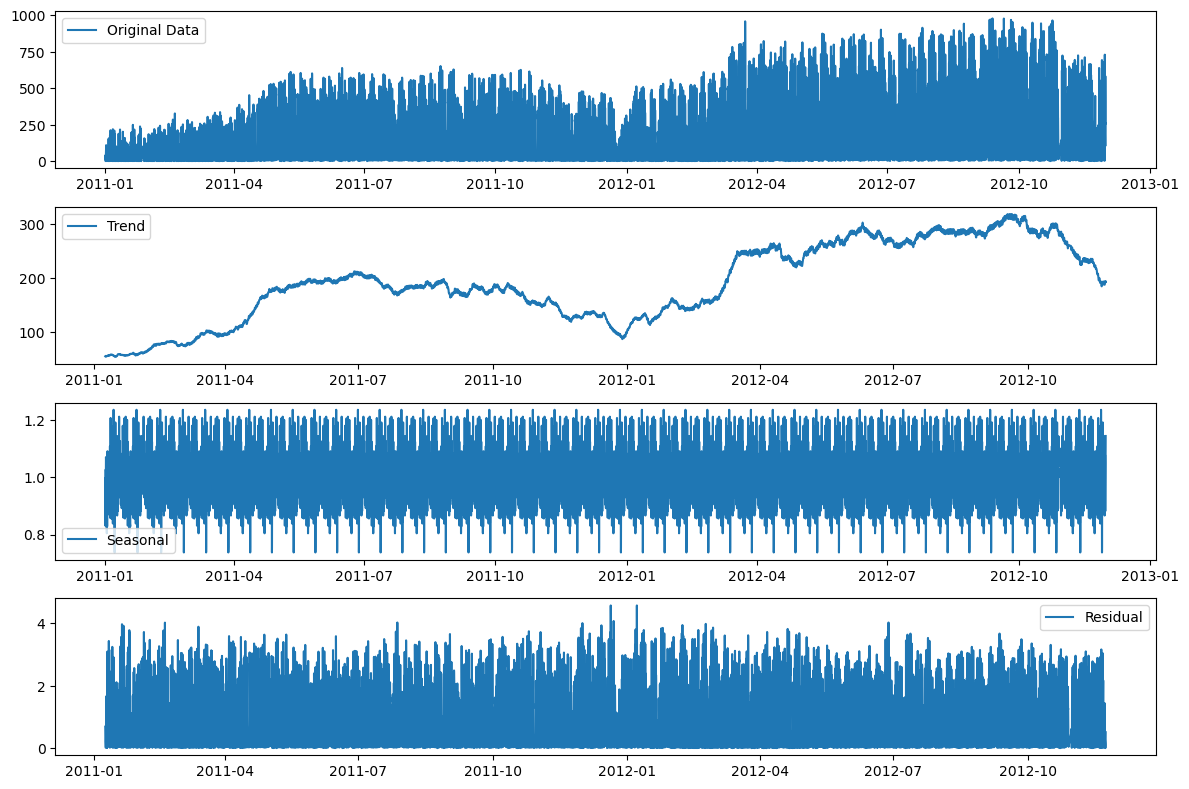

In [31]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming roll_train is already defined as per your previous code
# If not, make sure to define it as roll_train = train[["date_hour", "cnt"]].set_index("date_hour")

# Additional smoothing using a 24-hour moving average
# Perform seasonal decomposition on the smoothed data
result = seasonal_decompose(train1['cnt'], model='multiplicative', period=365)  # Adjust the period based on your data

# Plot the original data, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(train1['cnt'], label='Original Data')
plt.legend()

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


Bij de eerste subplot valt de originele tijdreeks te zien. Hierin valt vooral op dat er een dip is aan het begin van 2012 en dat na die dip de count hoger is in 2012.

Bij de tweede subplot valt de trend te zien. Hierin valt vooral op dat de trend stijgt in het begin van het jaar en dan richting het einde van het jaar weer daalt. Dit geldt voor beide jaren. Doordat de trend meer gematigd is kun je duidelijker het verschil zien tussen 2011 en 2012.

Bij de derde subplot vallen de seizoens patronen te zien. Er is een regelmatig patroon te zien dat zich steeds herhaalt. Dit betekend dat de seizoens patronen regelmatig zijn.

Bij de laatste subplot vallen de overige componenten (die niet onder trend seizoens patronen vallen) te zien. Er valt hier te zien dat er meer onregelmatige pieken zijn zijn.

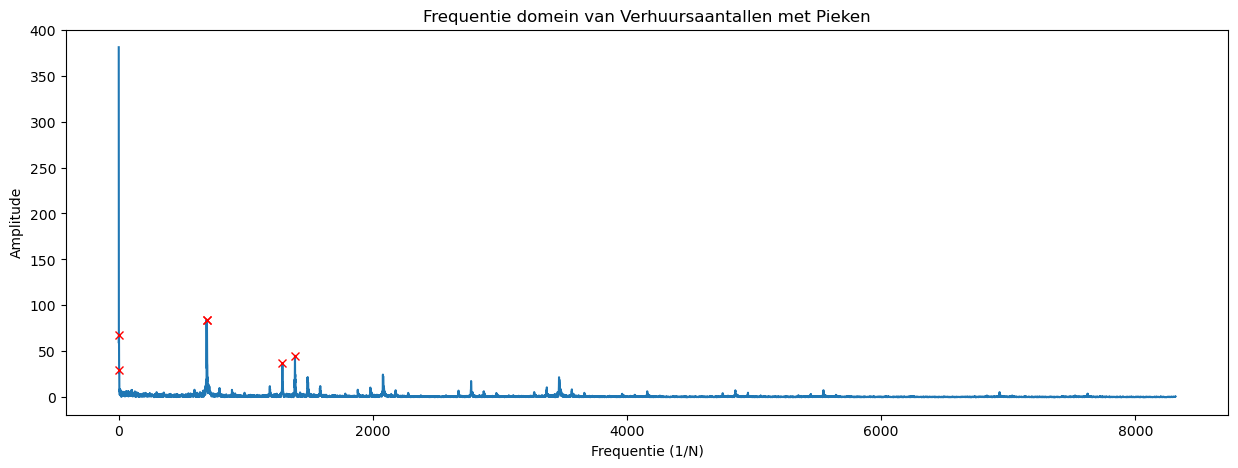

In [32]:
N = len(train1)
from scipy.signal import find_peaks
# Uitvoeren Fourier Transform
ft = np.fft.fft(train1['cnt'])

# Bereken de kracht van de frequenties
magnitude = 2.0 / N * np.abs(ft[:N // 2])

# Zoeken en tonen van de pieken
peaks, _ = find_peaks(magnitude, height=30)

# Plotten
plt.figure(figsize=(15, 5))
plt.plot(magnitude)
plt.plot(peaks, magnitude[peaks], 'rx')  # Mark peaks with red 'x'
plt.xlabel('Frequentie (1/N)')
plt.ylabel('Amplitude')
plt.title('Frequentie domein van Verhuursaantallen met Pieken')
plt.show()

<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

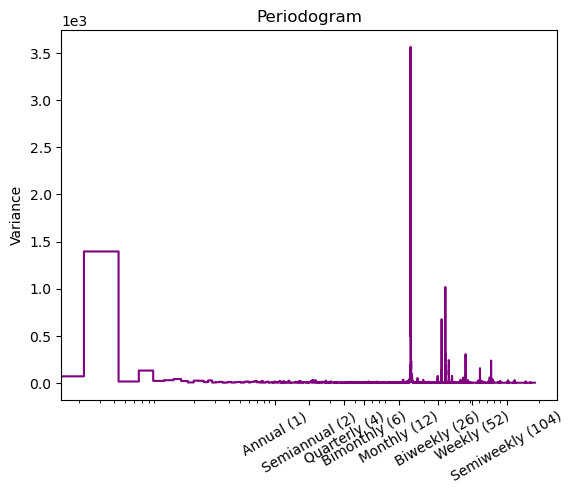

In [33]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta(days=365) / pd.Timedelta(days=1)
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

plot_periodogram(train1['cnt'].head(27375))

Een periodogram is een grafische weergave van de frequentiecomponenten in een tijdreeks. In het specifieke geval van deze code, toont het periodogram de verdeling van de frequenties in de tijdreeks 'cnt' uit de train-dataset.

- Bimonthly (6): Dit duidt op een dominant patroon dat zich herhaalt met een frequentie van ongeveer elke 6 datapunten. In de context van tijdreeksen zou dit kunnen suggereren dat er een patroon is dat zich ongeveer elke twee maanden herhaalt.

- Monthly (12): De piek op de maandelijkse frequentie suggereert dat er een patroon is dat zich elke maand herhaalt. Dit zou kunnen wijzen op seizoensgebonden variaties of patronen die elke maand optreden.

- Weekly (52): De piek op de wekelijkse frequentie geeft aan dat er een patroon is dat zich wekelijks herhaalt. Dit kan wijzen op een wekelijks patroon of seizoensgebondenheid in de tijdreeks.

De pieken in het periodogram geven aan welke frequenties sterke aanwezigheid hebben in de tijdreeks. In veel toepassingen komt het voor dat tijdreeksen seizoensgebonden patronen vertonen op verschillende tijdschalen, bijvoorbeeld wekelijkse, maandelijkse en jaarlijkse patronen. Het identificeren van deze frequentiecomponenten kan nuttig zijn voor het begrijpen van de structuur en het patroon in de gegevens, wat op zijn beurt kan helpen bij het modelleren en voorspellen van toekomstige waarden.

In [34]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
fourier = CalendarFourier(freq="A", order=12)
dp = DeterministicProcess(
    index=train1.index,
    constant=False,              
    order=1,                    
    seasonal=False,              
    additional_terms=[fourier],
    drop=True
)

X = dp.in_sample()
X.head()

,trend,"sin(1,freq=A-DEC)","cos(1,freq=A-DEC)","sin(2,freq=A-DEC)","cos(2,freq=A-DEC)","sin(3,freq=A-DEC)","cos(3,freq=A-DEC)","sin(4,freq=A-DEC)","cos(4,freq=A-DEC)","sin(5,freq=A-DEC)",...,"sin(8,freq=A-DEC)","cos(8,freq=A-DEC)","sin(9,freq=A-DEC)","cos(9,freq=A-DEC)","sin(10,freq=A-DEC)","cos(10,freq=A-DEC)","sin(11,freq=A-DEC)","cos(11,freq=A-DEC)","sin(12,freq=A-DEC)","cos(12,freq=A-DEC)"
date_hour,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2011-01-01 01:00:00,2.0,0.000717,1.000000,0.001435,0.999999,0.002152,0.999998,0.002869,0.999996,0.003586,...,0.005738,0.999984,0.006455,0.999979,0.007173,0.999974,0.007890,0.999969,0.008607,0.999963
2011-01-01 02:00:00,3.0,0.001435,0.999999,0.002869,0.999996,0.004304,0.999991,0.005738,0.999984,0.007173,...,0.011476,0.999934,0.012910,0.999917,0.014345,0.999897,0.015779,0.999876,0.017213,0.999852
2011-01-01 03:00:00,4.0,0.002152,0.999998,0.004304,0.999991,0.006455,0.999979,0.008607,0.999963,0.010759,...,0.017213,0.999852,0.019365,0.999812,0.021516,0.999769,0.023667,0.999720,0.025818,0.999667
2011-01-01 04:00:00,5.0,0.002869,0.999996,0.005738,0.999984,0.008607,0.999963,0.011476,0.999934,0.014345,...,0.022950,0.999737,0.025818,0.999667,0.028686,0.999588,0.031554,0.999502,0.034422,0.999407


<AxesSubplot:xlabel='date_hour'>

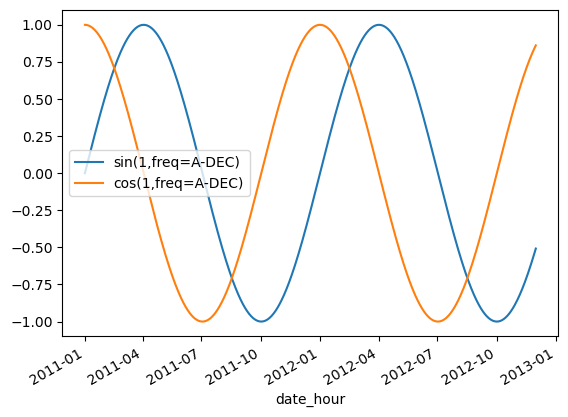

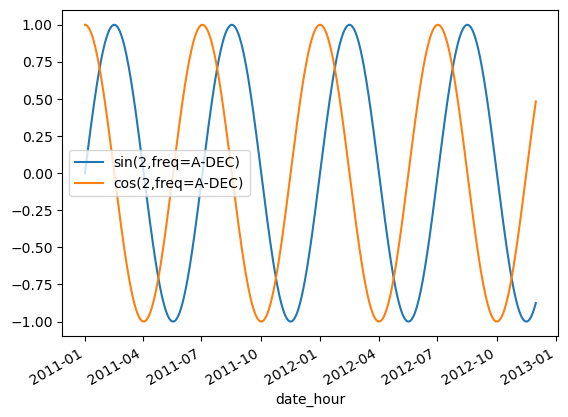

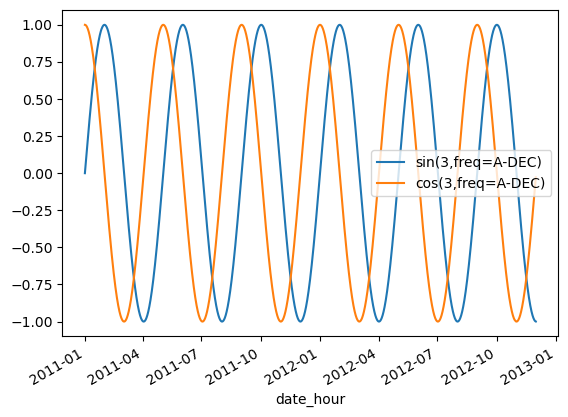

In [35]:
X[['sin(1,freq=A-DEC)','cos(1,freq=A-DEC)']].plot()
X[['sin(2,freq=A-DEC)','cos(2,freq=A-DEC)']].plot()
X[['sin(3,freq=A-DEC)','cos(3,freq=A-DEC)']].plot()


In alle 3 de bovenstaande grafieken is duidelijk een consistente sinusachtige beweging te zien. Deze sinusvormige beweging kan als een waardevolle eigenschap worden beschouwd en vervolgens worden toegevoegd als een kenmerk aan de datasets. Dit is relevant omdat het patroon in de sinusgolf informatie kan verschaffen over het wekelijkse of dagelijkse verloop, wat mogelijk belangrijk is voor het begrijpen en modelleren van de gegevens.

In [36]:
def running_average(x,order): #give the function a time series and an order (the width of the window)
  index = x.index 
  values = x.values 
  current = x.values[:order].sum() #the current value is the total sum of the first window starting from position 0 to position order-1
  running = [] 

  for i in range(order, x.shape[0]): #we move the window forward
    current += values[i] 
    current -= values[i-order] 
    running.append(current/order) #we append to our list of running values the current value divided by the size of the window; this will be our average value within that window

  run = x.iloc[order:].copy()
  run = np.array(running) 

  final = x.copy()[order:] 
  final.iloc[:,0] = run #asigning the array with the current running average values to all the other position from that location onwards

  return final

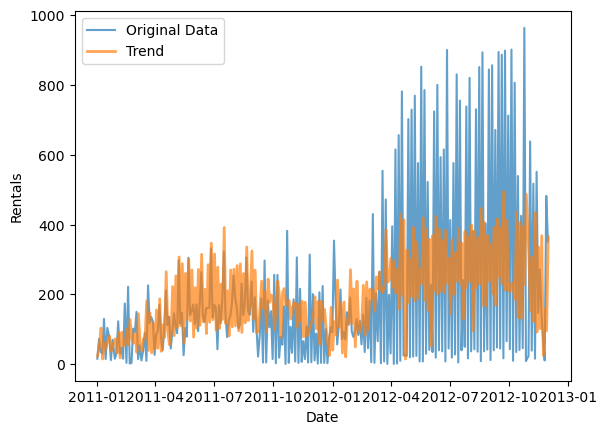

In [76]:
trend = running_average(train1, 12)  # Assuming you have a running_average function

fig, ax = plt.subplots(1, 1, dpi=100)

# Plot every nth point for both original data and trend (adjust n to control the density of points)
n = 60
ax.plot(train1.index[::n], train1['cnt'][::n], label='Original Data', alpha=0.7)
ax.plot(train1.index[12::n], trend[::n], label='Trend', linewidth=2, alpha = 0.7)

ax.set_xlabel('Date')
ax.set_ylabel('Rentals')
ax.legend()

plt.show()

In de uitgevoerde analyse is een moving average toegepast op de dataset. Het moving average, berekend met een specifieke venstergrootte, maakt kortetermijnschommelingen glad en onthult onderliggende trends in de gegevens. Opvallend is dat de waargenomen trend in het voortschrijdend gemiddelde een stijgende lijn vertoont na verloop van tijd. Deze opwaartse beweging duidt op een consistente en positieve verandering in het onderliggende patroon of gedrag, wat inzichten kan bieden in de evoluerende dynamiek en mogelijke langetermijntrends van de dataset. (Understanding Moving Averages - CME Group, z.d.)

In [38]:
detrended = train1.iloc[12:].div(trend)

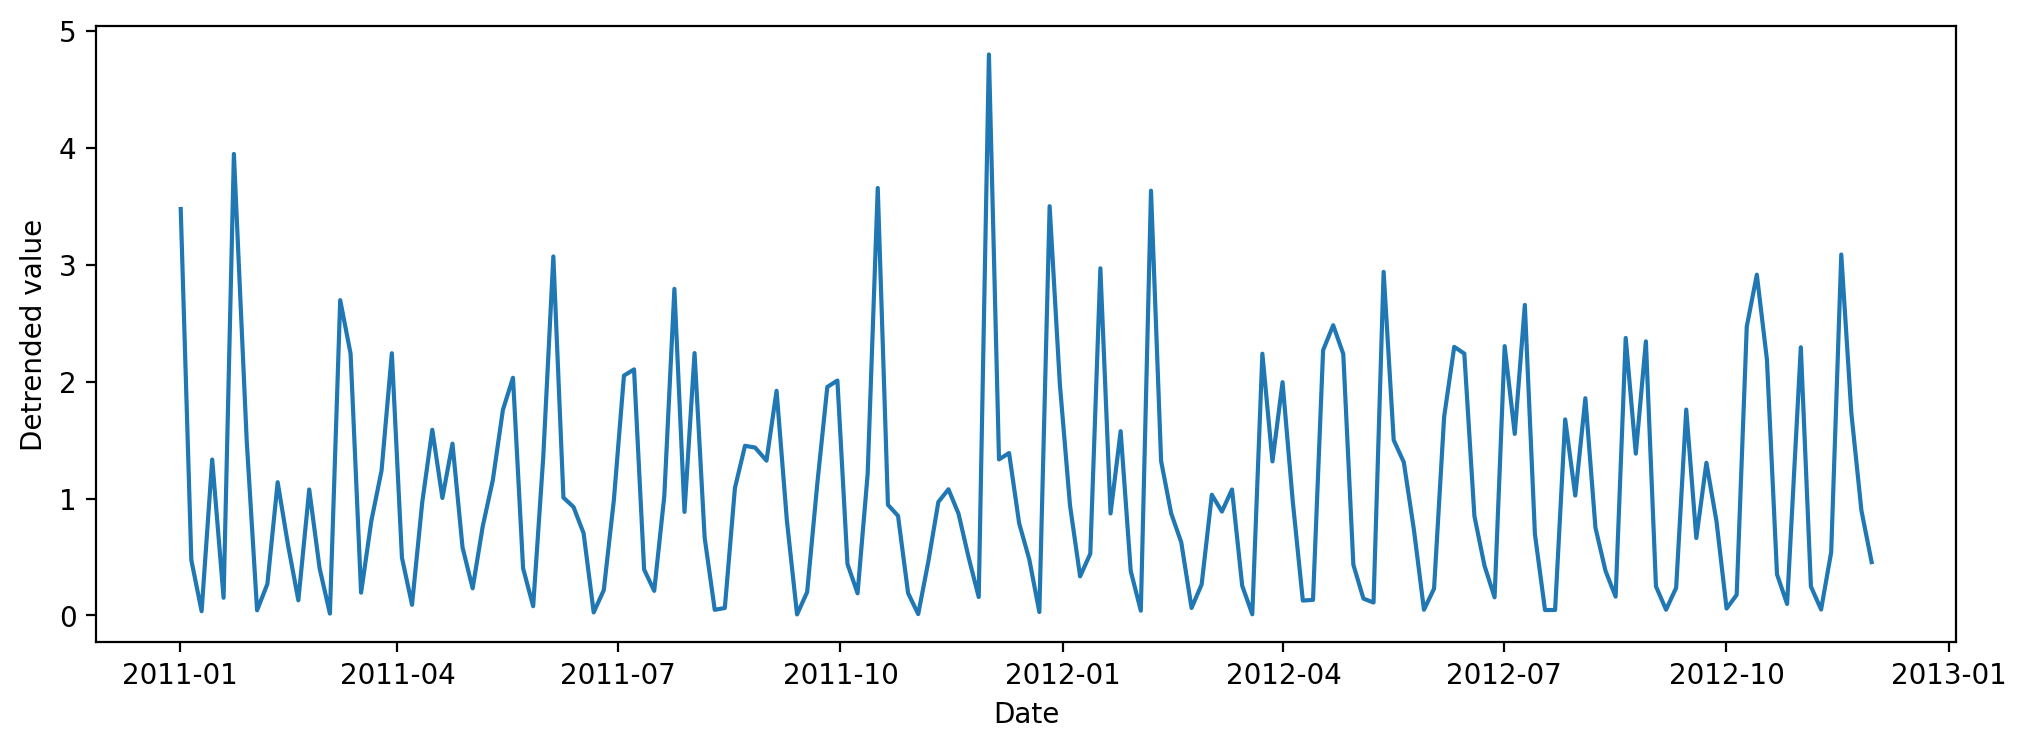

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4), dpi=200)

# Plot every nth point for detrended data (adjust n to control the density of points)
n = 100
ax.plot(train1.index[12::n], detrended[::n])

ax.set_ylabel('Detrended value')
ax.set_xlabel('Date')

plt.show()

In [40]:
descompunere = seasonal_decompose(train1, model = "multiplicative", period=365)

In [41]:
seasonality= descompunere.seasonal
trend= descompunere.trend
residuals= descompunere.resid

In [42]:
def plot_decomposition(trend, seasonality,residuals, n):
  fig, axs = plt.subplots(3,1,figsize =(15,10),dpi=150,sharex = True)
  index = train1.index

  axs[0].plot(index,trend)
  axs[0].set_title('Trend')
    
  axs[1].plot(index[12::n],seasonality[::n])
  axs[1].set_title('Seasonality')

  axs[2].plot(index[12::n],residuals[::n]) 
  axs[2].set_title('Residuals')

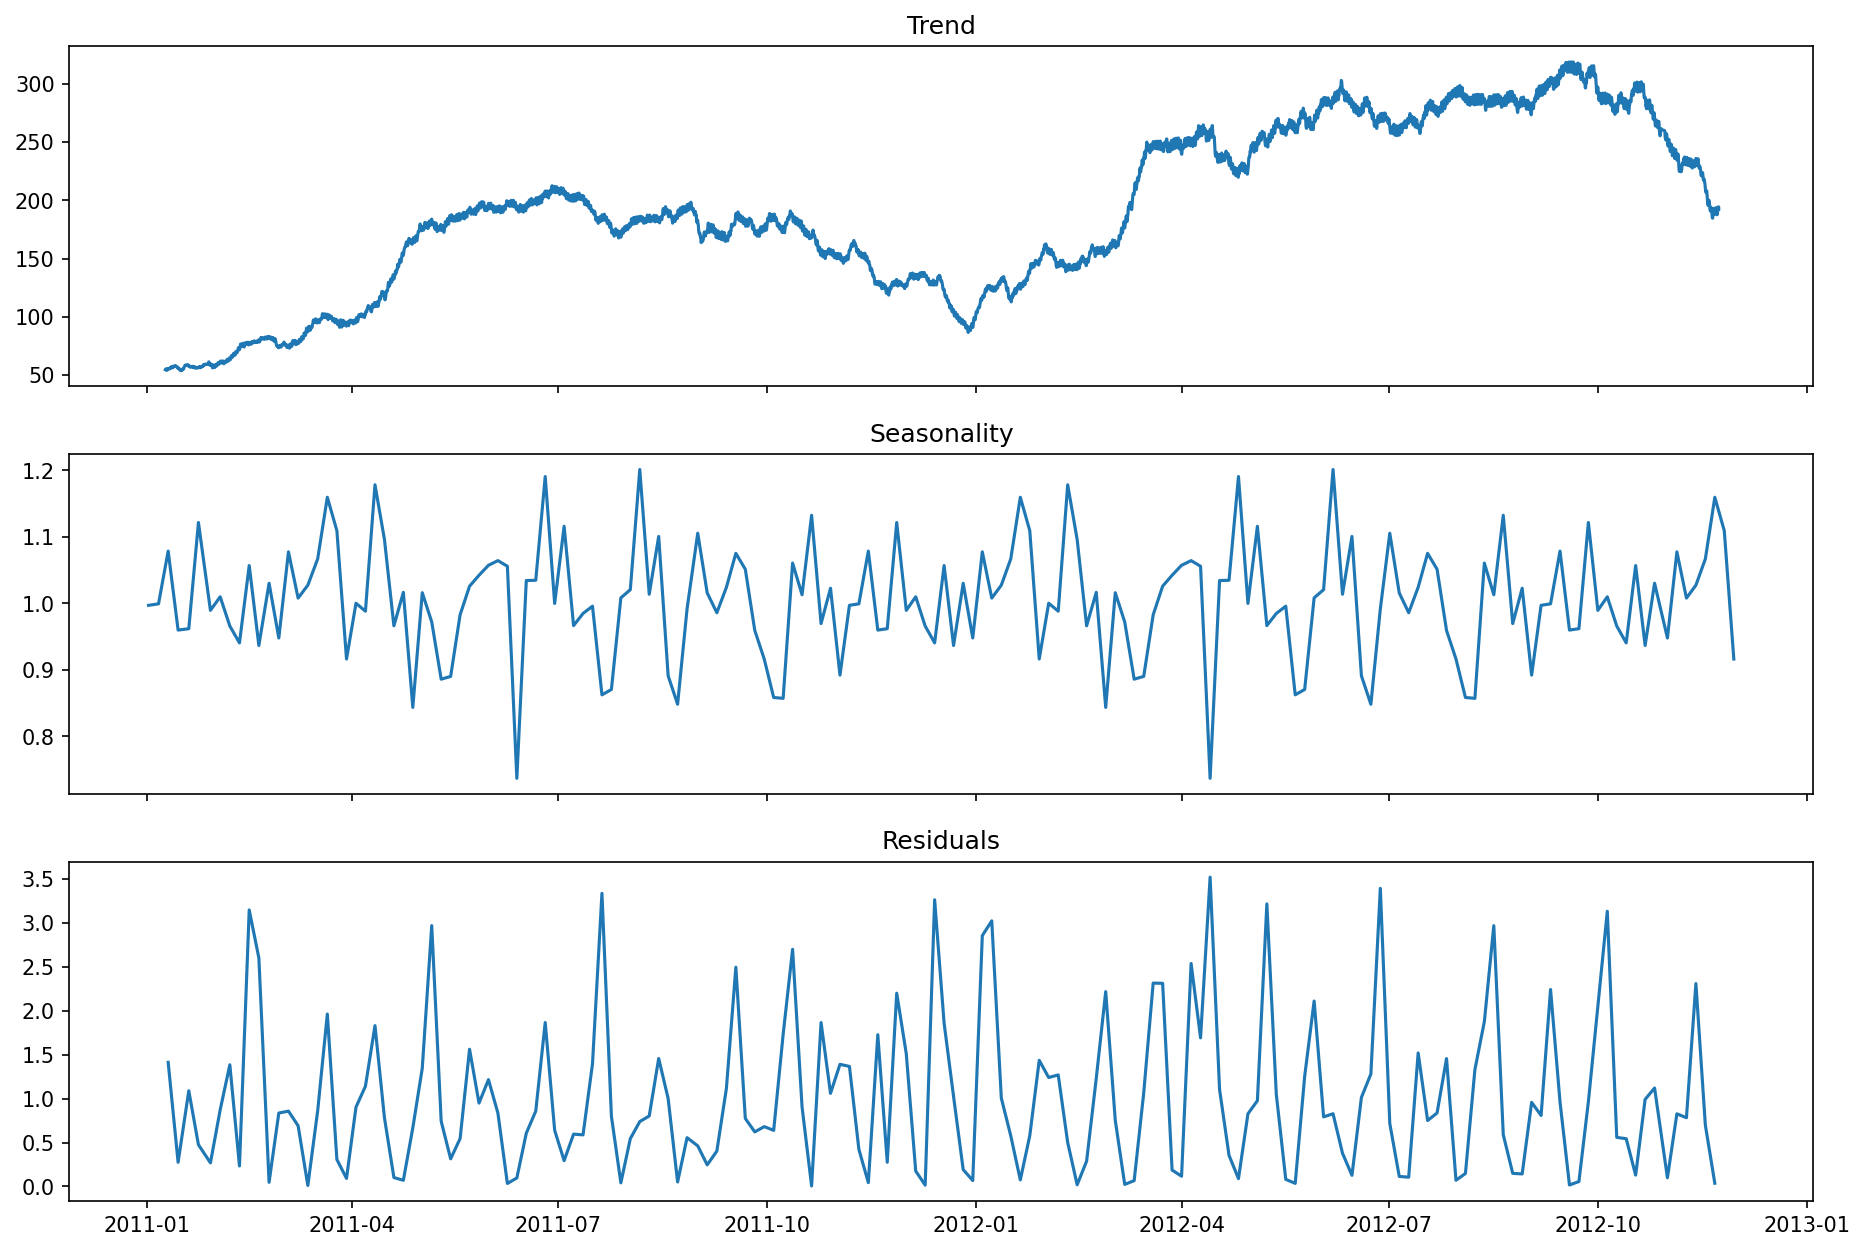

In [43]:
plot_decomposition(trend, seasonality,residuals,100)

In [44]:
signal = train1["cnt"].values
date = train1.index
N = len(signal)
fft_values = np.fft.fft(signal)
freq_values = np.fft.fftfreq(N,1/12)

Text(0, 0.5, 'Amplitude')

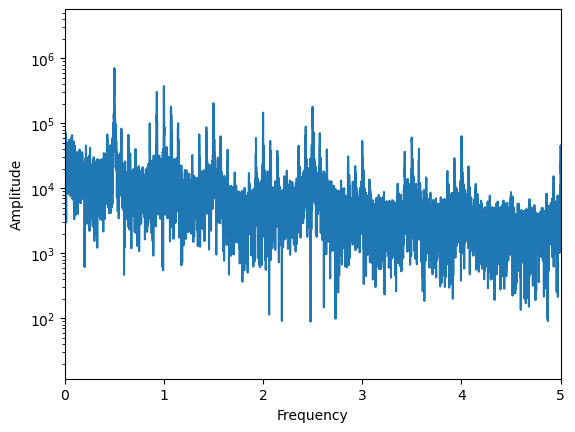

In [45]:
fig,ax = plt.subplots(1)
ax.semilogy(freq_values[:N//2], np.abs(fft_values[:N//2]))
ax.set_xlim(0,5)
ax.set_xlabel("Frequency")
ax.set_ylabel("Amplitude")

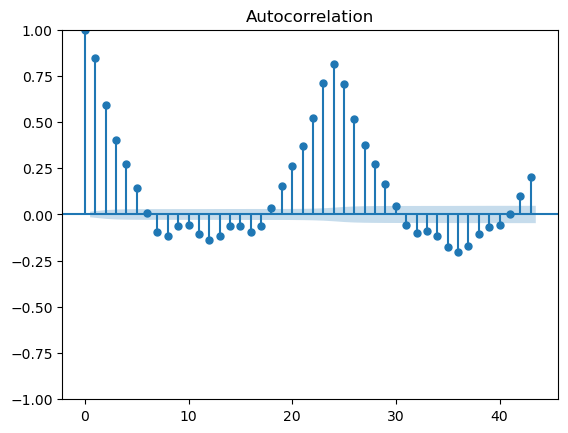

In [46]:
statsmodels.graphics.tsaplots.plot_acf(train1["cnt"]);

Dat time series modelling een iteratief proces is hebben wij zeker gemerkt. Bij het toevoegen van verschillende features met time series zijn we op het volgende gekomen.

Het was slim om "seizoen" toe te voegen aan ons model tijdens het bouwen en analyseren van de gegevens. We ontdekten dit niet alleen tijdens het eerste onderzoek van de gegevens, maar ook later toen we bezig waren met het fijnslijpen van ons model, vooral met SARIMA(X). Door seizoensinformatie toe te voegen, begrepen we de ups en downs die zich herhaalden veel beter, en dat is super belangrijk om nauwkeurige voorspellingen te doen.

In het begin hadden we ook "Peak_hours" en onderscheid tussen "weekend" en "werkdag" in ons model gestopt. Maar na een grondige check en analyse, hebben we besloten deze kenmerken eruit te halen. We ontdekten dat ze eigenlijk niet veel waardevolle info opleverden of echt hielpen bij het voorspellen.

Dit onderstreept echt waarom we steeds ons model aanpassen en de extra kenmerken beoordelen. Het feit dat we die "Peak_hours" en dagsoorten eruit haalden, laat zien dat we echt willen dat ons model alleen gebaseerd is op de dingen die er echt toe doen. Het is allemaal een proces van uitproberen, leren en het model verbeteren met de meest belangrijke dingen.

## 3. Modelling

###### Pre processing

In [47]:
train.head()

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,day,hour,season
0,2011-01-01 00:00:00,Not Holiday,Clear,0.24,0.2879,0.81,0.0896,16,2011,January,Saturday,0,Winter
1,2011-01-01 01:00:00,Not Holiday,Clear,0.22,0.2727,0.80,0.0896,40,2011,January,Saturday,1,Winter
2,2011-01-01 02:00:00,Not Holiday,Clear,0.22,0.2727,0.80,0.0896,32,2011,January,Saturday,2,Winter
3,2011-01-01 03:00:00,Not Holiday,Clear,0.24,0.2879,0.75,0.0896,13,2011,January,Saturday,3,Winter
4,2011-01-01 04:00:00,Not Holiday,Clear,0.24,0.2879,0.75,0.0896,1,2011,January,Saturday,4,Winter


In [48]:
prophet=train.copy()
train.drop(['date_hour', 'atemp', 'windspeed'], axis=1, inplace=True)

In [49]:
# One hot Endocing .
train = pd.get_dummies(train, columns=['season', 'weathersit', 'month', 'day'])

# Label Encoding.
label_encoder = LabelEncoder()

for i in ['holiday','year']:
    train[i] = label_encoder.fit_transform(train[i])

#### One-hot encoding
One-hot encoding wordt gebruikt om categorische variabelen om te zetten in een binair formaat (0 of 1) en nieuwe kolommen toe te voegen aan het DataFrame voor elke unieke waarde in de oorspronkelijke kolom. In dit geval worden de kolommen 'season', 'weathersit', 'month', en 'day' one-hot gecodeerd. Elke unieke waarde in deze kolommen wordt omgezet in een nieuwe kolom met binaire waarden.

#### Label encoding
Label encoding wordt gebruikt om categorische variabelen om te zetten in getallen. Voor elke kolom in de lijst ['holiday', 'year'] wordt de LabelEncoder toegepast. Deze encoder wijst een unieke numerieke waarde toe aan elke unieke categorie in de gekozen kolommen. De getransformeerde waarden worden vervolgens opgeslagen in dezelfde kolommen ('holiday', 'year').

Hier is een voorbeeld van hoe label encoding werkt:

Voor de kolom 'holiday':

Oorspronkelijke waarden: 'Yes', 'No'
Na label encoding: 0, 1
Voor de kolom 'year':

Oorspronkelijke waarden: 2020, 2021, ...
Na label encoding: 0, 1, ...

In [50]:
# List of columns to scale
columns_to_scale = ['temp', 'hum', 'hour']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler on the selected columns to calculate mean and standard deviation
scaler.fit(train[columns_to_scale])

# Transform the selected columns using the calculated mean and standard deviation
train[columns_to_scale] = scaler.transform(train[columns_to_scale])

In [51]:
# Split data into x and y.
X = train.drop("cnt", axis=1)
y = train["cnt"]

# Split train data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Define the Root Mean Squared Error (RMSE) scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def evaluate_regr(y_true, y_pred):
    rmsle_val = rmse(y_true, y_pred)
    return rmsle_val
# Make the RMSE scorer
rmse_scorer = make_scorer(rmse)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [53]:
print('---------------------Linear-----------------------')
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
lr_=evaluate_regr(y_test, lr_reg.predict(X_test))
lr_r2_score_train=r2_score(y_train, lr_reg.predict(X_train))
lr_r2_score_check=r2_score(y_test, lr_reg.predict(X_test))
print('lr_r2_score_train=',lr_r2_score_train)
print('lr_r2_score_check=',lr_r2_score_check)
print('lr_MSE=',mean_squared_error(y_test,lr_reg.predict(X_test)))
print('lr_rmse=', lr_)

---------------------Linear-----------------------
lr_r2_score_train= 0.40669695390610694
lr_r2_score_check= 0.41284094455828957
lr_MSE= 18663.237579345703
lr_rmse= 136.61346046179236


Lineaire regressie is een statistische methode die wordt gebruikt om de relatie tussen een afhankelijke variabele en één of meer onafhankelijke variabelen te modelleren. Het basisidee is om de lineaire vergelijking te vinden die het beste de afhankelijke variabele voorspelt op basis van de onafhankelijke variabelen. In eenvoudige lineaire regressie met één onafhankelijke variabele neemt de vergelijking de vorm aan \(y = mx + b\), waarbij \(y\) de afhankelijke variabele is, \(x\) de onafhankelijke variabele, \(m\) de helling, en \(b\) de y-intercept.

Het doel van lineaire regressie is om de waarden van de coëfficiënten (helling en intercept) te bepalen die het verschil tussen de waargenomen waarden en de waarden voorspeld door de lineaire vergelijking minimaliseren. Dit wordt typisch bereikt door een verliesfunctie te minimaliseren, die de fout kwantificeert tussen de voorspelde (\(y_{\text{pred}}\)) en werkelijke (\(y_{\text{actual}}\)) waarden:


Lineaire regressie kan worden uitgebreid naar meerdere onafhankelijke variabelen in een proces genaamd meervoudige lineaire regressie, waarbij de vergelijking een hypervlak wordt in een meerdimensionale ruimte.

Om mogelijke overpassing (overfitting) in lineaire regressie aan te pakken, worden regularisatietechnieken toegepast. Regularisatie houdt in dat er een boeteterm aan de verliesfunctie wordt toegevoegd om te ontmoedigen dat het model te complex wordt. Twee veelvoorkomende vormen van regularisatie in lineaire regressie zijn L1-regularisatie (Lasso) en L2-regularisatie (Ridge). De verliesfunctie met regularisatie heeft de vorm:

\[ \text{Verlies}_{\text{reg}} = \text{Verlies} + \lambda \left( \alpha \sum_{j=1}^{p} \lvert \beta_j \rvert + (1 - \alpha) \sum_{j=1}^{p} \beta_j^2 \right) \]

Hier is \(\lambda\) de sterkte van de regularisatie, \(\alpha\) de mengparameter tussen L1- en L2-regularisatie, \(\beta_j\) zijn de regressiecoëfficiënten, en \(p\) is het aantal kenmerken. 

In het kort streeft lineaire regressie ernaar de best passende lineaire vergelijking te vinden door een verliesfunctie te minimaliseren die het verschil tussen voorspelde en werkelijke waarden kwantificeert. Regularisatie wordt vervolgens toegepast om overpassing te voorkomen door complexe modellen te bestraffen. (What is linear regression? - Linear regression explained - AWS, z.d.)

In [54]:
print('---------------------Ridge-----------------------')
ridge_reg=GridSearchCV(Ridge(), param_grid={'alpha':np.linspace(-2.0,50.0,20)}, cv=5)
ridge_model=ridge_reg.fit(X_train, y_train)
ridge_=evaluate_regr(y_test, ridge_model.predict(X_test))
print('ridge best_para', ridge_reg.best_params_)
print('ridge best_score', ridge_reg.best_score_)
ridge_r2_score_train=r2_score(y_train,ridge_model.predict(X_train))
ridge_r2_score_check=r2_score(y_test,ridge_model.predict(X_test))
print('ridge_r2_score_train=',ridge_r2_score_train)
print('ridge_r2_score_check=',ridge_r2_score_check)
print('ridge_MSE=',mean_squared_error(y_test,ridge_model.predict(X_test)))
print('ridge_rmse=', ridge_)

---------------------Ridge-----------------------
ridge best_para {'alpha': 28.105263157894736}
ridge best_score 0.40455029792153796
ridge_r2_score_train= 0.4074143217407795
ridge_r2_score_check= 0.413567956884596
ridge_MSE= 18640.1290133733
ridge_rmse= 136.52885780439715


Ridge-regressie is een variant van lineaire regressie die een regularisatieterm toevoegt om overpassing (overfitting) te voorkomen en het model te stabiliseren wanneer er multicollineariteitsproblemen zijn tussen de onafhankelijke variabelen. Het kernidee achter ridge-regressie is om een boeteterm toe te voegen aan de traditionele kostenfunctie van lineaire regressie, ook wel de verliesfunctie genoemd.

De kostenfunctie in ridge-regressie, vaak de Ridge-verliesfunctie genoemd, is een combinatie van de gewone kleinste-kwadraten (OLS) verliesfunctie en een regularisatieterm. Het doel van de OLS-verliesfunctie is het minimaliseren van de som van de gekwadrateerde verschillen tussen de voorspelde en werkelijke waarden, terwijl de regularisatieterm grote coëfficiënten bestraft. De Ridge-verliesfunctie is als volgt:

\[ \text{Ridge-verlies} = \text{OLS-verlies} + \lambda \sum_{j=1}^{p} \beta_j^2 \]

Hier is \(\text{OLS-verlies}\) het gewone kleinste-kwadraten verlies, \(\beta_j\) zijn de regressiecoëfficiënten, \(p\) is het aantal kenmerken, en \(\lambda\) is de sterkte van de regularisatie. De term \(\sum_{j=1}^{p} \beta_j^2\) is de gekwadrateerde L2-norm van de coëfficiëntvector en bestraft grote waarden van de coëfficiënten.

De sterkte van de regularisatie, \(\lambda\), is een hyperparameter die de afweging regelt tussen het goed passen van de gegevens en het beperken van de grootte van de coëfficiënten. Een hogere \(\lambda\) leidt tot sterkere regularisatie, waardoor de coëfficiënten dichter bij nul worden geduwd.

Ridge-regressie is met name nuttig wanneer er sprake is van multicollineariteit in de dataset, wat betekent dat de onafhankelijke variabelen sterk gecorreleerd zijn. In dergelijke gevallen kan gewone lineaire regressie leiden tot instabiele en sterk variabele schattingen van de coëfficiënten. Ridge-regressie helpt deze schattingen te stabiliseren door de grootte van de coëfficiënten te beperken.

Samengevat voegt ridge-regressie een regularisatieterm toe aan het lineaire regressiemodel, met als doel de balans te vinden tussen het goed passen van de gegevens en het voorkomen dat de coëfficiënten te groot worden. Het is een waardevol instrument voor het omgaan met multicollineariteit en het voorkomen van overpassing in lineaire regressiemodellen. (Great Learning Team, 2022)

In [55]:
print('---------------------Lasso-----------------------')
lasso_reg=GridSearchCV(Lasso(), param_grid={'alpha':[300,200,100,10,1,0.1,0.01,0.001]}, cv=5)
lasso_model=lasso_reg.fit(X_train, y_train)
lasso_=evaluate_regr(y_test, lasso_model.predict(X_test))
print('lasso best_para', lasso_reg.best_params_)
print('lasso best_score', lasso_reg.best_score_)
lasso_r2_score_train=r2_score(y_train,lasso_model.predict(X_train))
lasso_r2_score_check=r2_score(y_test,lasso_model.predict(X_test))
print('lasso_r2_score_train=',lasso_r2_score_train)
print('lasso_r2_score_check=',lasso_r2_score_check)
print('lasso_MSE=',mean_squared_error(y_test,lasso_model.predict(X_test)))
print('lasso_rmse=', lasso_)

---------------------Lasso-----------------------
lasso best_para {'alpha': 0.1}
lasso best_score 0.4045692653526752
lasso_r2_score_train= 0.40736040714310007
lasso_r2_score_check= 0.4137832582683376
lasso_MSE= 18633.285516983873
lasso_rmse= 136.50379304980456


### Random Forest Regressor

In [56]:
print('---------------------RandomForest-----------------------')
rf_reg=GridSearchCV(RandomForestRegressor(), 
                    param_grid={'n_estimators':[10,30,100,300,500]}, 
                    cv=5)
rf_model=rf_reg.fit(X_train, y_train)
rf_=evaluate_regr(y_test, rf_model.predict(X_test))
print('best_para', rf_reg.best_params_)
print('best_score', rf_reg.best_score_)
rf_r2_score_train=r2_score(y_train,rf_model.predict(X_train))
rf_r2_score_check=r2_score(y_test,rf_model.predict(X_test))
print('rf_r2_score_train=',rf_r2_score_train)
print('rf_r2_score_check=',rf_r2_score_check)
print('rf_MSE=',mean_squared_error(y_test,rf_model.predict(X_test)))
print('rf_rmse=', rf_)


---------------------RandomForest-----------------------
best_para {'n_estimators': 500}
best_score 0.9348514581715011
rf_r2_score_train= 0.9915105905393585
rf_r2_score_check= 0.940302112911266
rf_MSE= 1897.5366885619032
rf_rmse= 43.560724151027415


**Wat is een Random Forest?**

Een random forest is een machine learning-techniek die wordt gebruikt om regressie- en classificatieproblemen op te lossen. Het maakt gebruik van ensemble learning, een techniek die vele classificatoren combineert om oplossingen te bieden voor complexe problemen.

Een random forest-algoritme bestaat uit veel decision trees. De 'forest' dat gegenereerd wordt door het random forest-algoritme wordt getraind via bagging of bootstrap aggregating. Bagging, ook wel bekend als bootstrap aggregating, is de ensemble learning-methode die doorgaans wordt gebruikt om de variantie binnen een rumoerige dataset te verminderen.

Het (random forest) algoritme bepaalt de uitkomst op basis van de voorspellingen van de decision trees. Het voorspelt door het gemiddelde te nemen van de uitvoer van verschillende bomen. Het verhogen van het aantal bomen verhoogt de precisie van de uitkomst.

**Hoe werkt een Random Forest?**

Random Forest werkt door een set beslisbomen te combineren tot een ensemble. Elke boom is gebouwd met willekeurige subsets van gegevens. Hierdoor kan het Random Forest-algoritme meer accurate voorspellingen maken dan traditionele machine learning-methoden. Het willekeurige selectieproces helpt de variantie en overfitting binnen het model te verminderen, terwijl het robuuster en bestendiger wordt tegen ruis in de gegevens. (Donges, 2021)

Het proces begint met het voorbereiden van meerdere subsets van de trainingsdata door middel van **bootstrap aggregating**, ook wel bekend als "bagging". Bagging houdt in dat er willekeurig monsters (steekproeven) worden genomen uit de oorspronkelijke trainingsdata met vervanging. Dit betekent dat sommige gegevenspunten meerdere keren in dezelfde subset kunnen voorkomen, terwijl andere helemaal niet worden opgenomen.

Voor elke subset van de trainingsdata wordt een afzonderlijke beslisboom gebouwd. Dit gebeurt met behulp van een beslisboomalgoritme, zoals **CART** (Classification and Regression Trees) of **Gini-index**, om de dataset in verschillende kenmerkensplitsingen op te delen. Belangrijk is dat bij elke split in de boom slechts een willekeurige subset van de beschikbare kenmerken wordt overwogen. Dit vermindert de correlatie tussen de bomen en voorkomt overfitting. (Yiu, 2021)

Tijdens de training genereert Random Forest meerdere beslisbomen, die worden gebruikt om voorspellingen te doen voor ongeziene gegevenspunten (testinstanties). Bij voorspellingstijd berekent het Random Forest-algoritme het resultaat voor een gegeven testinstantie door het gemiddelde te nemen van de voorspellingen van elke boom. Dit gemiddelde mechanisme helpt de variantie van het Random Forest-model te verminderen en leidt tot meer accurate voorspellingen.

Ze kunnen nauwkeurig voorspellingen doen met minimaal voorafgaand gegevenspreprocessing en bieden robuuste voorspellende nauwkeurigheid, zelfs in lawaaierige datasets. Bovendien zijn Random Forests eenvoudig te trainen en schalen ze goed naar grote datasets met duizenden functies of dimensies.
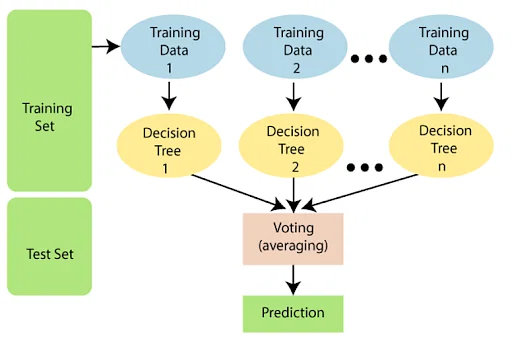
*IMAGE COURTESY: javapoint*

ENSEMBLE OVERVIEW, XGBOOST LGBOOST

In [57]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=700,
                  max_depth=7,
                  learning_rate=0.05)
xgb.fit(X_train,y_train)

lgb = LGBMRegressor(n_estimators=600,
                   max_depth=6,
                   learning_rate=0.1)
lgb.fit(X_train,y_train)


gb_ensemble = [('xgb',xgb),('lgb',lgb)]
voting_gb = VotingRegressor(gb_ensemble).fit(X_train,y_train)

In [58]:
gb_ensemble = [('xgb',xgb),('lgb',lgb)]
voting_gb = VotingRegressor(gb_ensemble).fit(X_train,y_train)

names_gb = ['xgb','lgb','gb ensemble']
scores_gb = []
for counter,i in enumerate([xgb,lgb,voting_gb]):
    scores_gb.append( np.sqrt(mean_squared_error(y_test,i.predict(X_test)) ))
tmp = pd.DataFrame(scores_gb,names_gb).T

tmp.head(5)

,xgb,lgb,gb ensemble
0,38.258594,39.512187,38.089605


Aangezien onze ensemble gebruikt maakt van voting tussen de XGBoost regressor en de LGBM Regressor zal ik beide uitleggen.

#### XGBoost Regressor
XGBoost is een krachtige benadering voor het bouwen van begeleide regressiemodellen. De geldigheid van deze verklaring kan worden afgeleid uit de kennis over de doelfunctie en basismodellen van XGBoost. De doelfunctie bevat een verliesfunctie en een regularisatieterm. Het geeft informatie over het verschil tussen de werkelijke waarden en voorspelde waarden, oftewel hoe ver de modelresultaten verwijderd zijn van de echte waarden. De meest voorkomende verliesfunctie in XGBoost voor regressieproblemen is reg:linear, en voor binaire classificatie is dit reg:logistics. Ensemble learning houdt in dat individuele modellen (bekend als basismodellen) worden getraind en gecombineerd om een enkele voorspelling te verkrijgen, en XGBoost is een van de ensemble learning-methoden. XGBoost verwacht dat de basismodellen uniform slecht zijn in de rest, zodat wanneer alle voorspellingen worden gecombineerd, slechte voorspellingen elkaar opheffen en betere voorspellingen samenkomen om uiteindelijk goede voorspellingen te vormen. (Brownlee, 2021)

#### LGBM Regressor
LightGBM is een ensemble methode voor gradient boosting die wordt gebruikt door de Train Using AutoML-tool en is gebaseerd op beslissingsbomen. Net als andere op beslissingsboom gebaseerde methoden, kan LightGBM worden gebruikt voor zowel classificatie als regressie. LightGBM is geoptimaliseerd voor hoge prestaties met gedistribueerde systemen.(GeeksforGeeks, 2023)

LightGBM creëert beslissingsbomen die op een bladwijze groeien, wat betekent dat gegeven een voorwaarde slechts een enkel blad wordt gesplitst, afhankelijk van de winst. Bladwijze bomen kunnen soms overpassen, vooral bij kleinere datasets. Het beperken van de boomdiepte kan helpen overpassing te voorkomen.

#### Voting ensemble
Een "voting ensemble" is een techniek in machine learning waarbij meerdere modellen worden gecombineerd om gezamenlijk een voorspelling te doen. Bij deze benadering worden voorspellingen van afzonderlijke modellen samengevoegd, en de uiteindelijke uitkomst wordt bepaald door een meerderheidsstem of een gewogen gemiddelde van de individuele voorspellingen.

In het geval van **LightGBM** en **XGBoost**, twee populaire gradient boosting-algoritmen, zou een voting ensemble als volgt kunnen worden toegepast:

**Individuele Modellen Trainen:**
Train afzonderlijke modellen met behulp van LightGBM en XGBoost op dezelfde dataset. Je kunt verschillende 
hyperparameters gebruiken voor elk model om diversiteit te bevorderen.

**Voorspellingen Verzamelen:**
Laat elk model voorspellingen doen op nieuwe gegevens.

**Voting Mechanisme:**
Implementeer een eenvoudig meerderheidsstemmingssysteem waarbij de uiteindelijke voorspelling wordt bepaald op basis van de meerderheid van de individuele voorspellingen. Bijvoorbeeld, als meer modellen een bepaalde klasse voorspellen, wordt dat als de uiteindelijke voorspelling beschouwd. (Brownlee, 2021)

Of je kunt een gewogen gemiddelde gebruiken waarbij de bijdrage van elk model aan de uiteindelijke voorspelling wordt bepaald door de prestaties van dat model op de validatieset.

**Uiteindelijke Voorspelling:**
De uiteindelijke voorspelling van het ensemble wordt gebruikt als het gezamenlijke resultaat van zowel LightGBM als XGBoost.

## SARIMAX

ARIMA staat voor Auto Regressive Integrated Moving Average. Het is een combinatie van twee modellen: het **AR (Auto Regressive)** model dat achterwaartse waarden van de tijdreeks gebruikt voor voorspellingen, en het **MA (Moving Average)** model dat achterwaartse waarden van residu-afwijkingen gebruikt om te voorspellen. Met andere woorden, dit model maakt gebruik van afhankelijkheden zowel tussen gegevenswaarden als foutwaarden uit het verleden om de voorspellingen te optimaliseren. (Barretto, 2022)

ARIMA gebruikt drie parameters - **ARIMA(p,d,q)**:

- Auto Regressive term **p**: Het aantal autoregressieve lags.
- Order of differencing term **d**: Het aantal keren dat de differentiatie voorbewerking wordt toegepast om de tijdreeks stationair te maken.
- Moving Average term **q**: Het aantal bewegende gemiddelde lags.

We kunnen geen tijdreeks modelleren als deze niet stationair is. De parameter **d** stelt ons in staat differentiatie toe te passen binnen ARIMA.

Het is ook mogelijk om transformaties toe te passen voordat we ARIMA toepassen om de tijdreeks stationair te maken. Wanneer we echter differentiatie op deze manier toepassen, voorspellen we op basis van getransformeerde gegevens. Daarom moeten we de transformatie omkeren om toegang te krijgen tot de voorspellingen van de oorspronkelijke waarden.

We moeten voorzichtig zijn bij het selecteren van de juiste mate van differentiatie. We differentiëren de gegevens alleen totdat ze stationair zijn en niet meer. Om de hoeveelheid differentiatie, oftewel de waarde van de parameter d, te kiezen, kunnen we de Augmented Dickey-Fuller (ADF)-test en Kwiatkowski-Phillips-Schmidt-Shin (KPSS)-test gebruiken. 

Dit is ook de reden dat we hierna een Augmented Dickey-Fuller Test uitvoeren.

In [59]:
from statsmodels.tsa.stattools import adfuller

from pmdarima.arima import auto_arima
from pmdarima import pipeline
from pmdarima import model_selection
from pmdarima import preprocessing as ppc
from pmdarima import arima

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In de statistiek is de Augmented Dickey–Fuller-test (ADF) een test om te zien of een tijdreeks een "unit root" heeft, wat wijst op een gebrek aan stabiliteit. Als de test de aanwezigheid van een unit root aantoont, suggereert dit meestal dat de tijdreeks niet stationair is of een neiging heeft om te veranderen in de loop van de tijd. Het is als een gereedschap om te kijken of er iets in de gegevens is dat ze instabiel maakt of dat er een trend aanwezig is.(Augmented Dickey-Fuller test - MATLAB Adftest, z.d.)

In [60]:
adf_test(train1['cnt'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.625165e+00
p-value                 5.901289e-09
# lags used             4.300000e+01
# observations          1.659300e+04
critical value (1%)    -3.430744e+00
critical value (5%)    -2.861714e+00
critical value (10%)   -2.566863e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


De p-waarde is veel kleiner dan de significantie van 0.05, dus onze dataset is stationair. (Wavetech, z.d.)

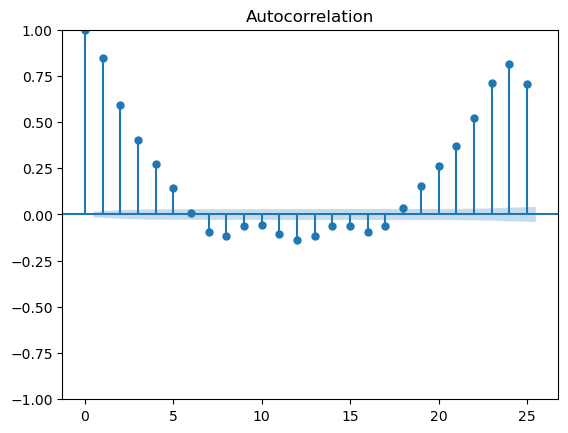

In [61]:
plot_acf(train1['cnt'], lags = 25); print()

In [62]:
tr_start,tr_end = '2011-01-01','2012-01-01'
te_start,te_end = '2012-01-02','2013-01-01'
x0 = train1['cnt'][tr_start:tr_end].dropna()
x1 = train1['cnt'][te_start:te_end].dropna()

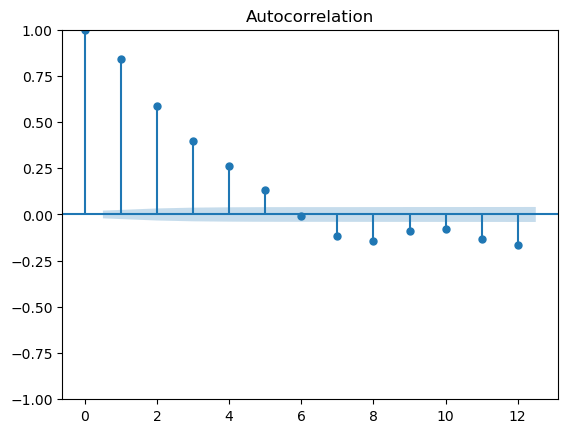

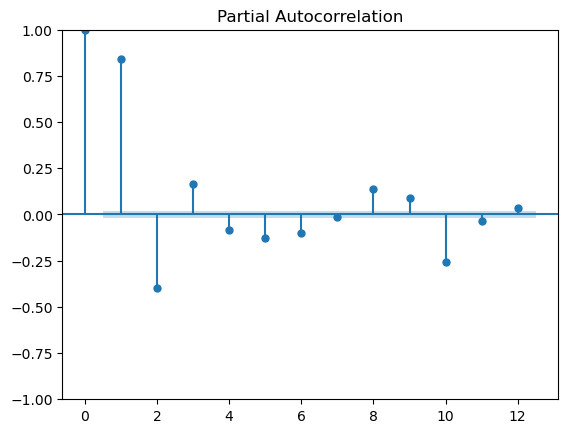

In [63]:
plot_acf(x0, lags = 12); print()
plot_pacf(x0, lags = 12); print()

Autocorrelatie betekent simpelweg dat we kijken naar hoe een tijdreeks met zichzelf correleert op verschillende momenten in de tijd. Het is als een manier om te zien of er herhalende patronen zijn, zoals cycli of seizoensgebonden trends, in de gegevens.

Partial autocorrelatie is eigenlijk hetzelfde idee, maar het negeert terugkerende seizoenspatronen. Stel je voor dat je al hebt vastgesteld dat er bijvoorbeeld elke 24 uur een patroon is. Met partial autocorrelatie wordt dit patroon onderdrukt bij elke nieuwe 24-uursperiode. Dit maakt het gemakkelijker om te zien of er overlappende seizoenspatronen of cycli zijn die je kunt gebruiken voor een diepere analyse van de tijdreeks.

In [64]:
model_autoARIMA = auto_arima(x0, start_p=7, start_q=7 ,
                      test='adf',       
                      max_p= 7, max_q=7, 
                      m= 7,              
                      d= 1,
                      seasonal=True,   
                      start_P=1, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(6,1,6)(1,1,1)[7]             : AIC=inf, Time=33.90 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=107584.569, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=101567.834, Time=0.91 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=1.76 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=106400.697, Time=0.19 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=100888.800, Time=1.94 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=7.18 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=2.45 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=101692.798, Time=0.82 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=100402.958, Time=2.57 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=101327.905, Time=1.44 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=9.19 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=3.95 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=100246.840, Time=3.43 sec
 ARIMA(3,1,0)(1,1,0)[7]             : AIC=1013

In [65]:
print(model_autoARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 8669
Model:             SARIMAX(6, 1, 0)x(2, 1, 0, 7)   Log Likelihood              -50044.532
Date:                           Sun, 26 Nov 2023   AIC                         100107.065
Time:                                   23:40:26   BIC                         100170.664
Sample:                                        0   HQIC                        100128.747
                                          - 8669                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3670      0.008     45.938      0.000       0.351       0.383
ar.L2         -0.2448      0.011    -22.821

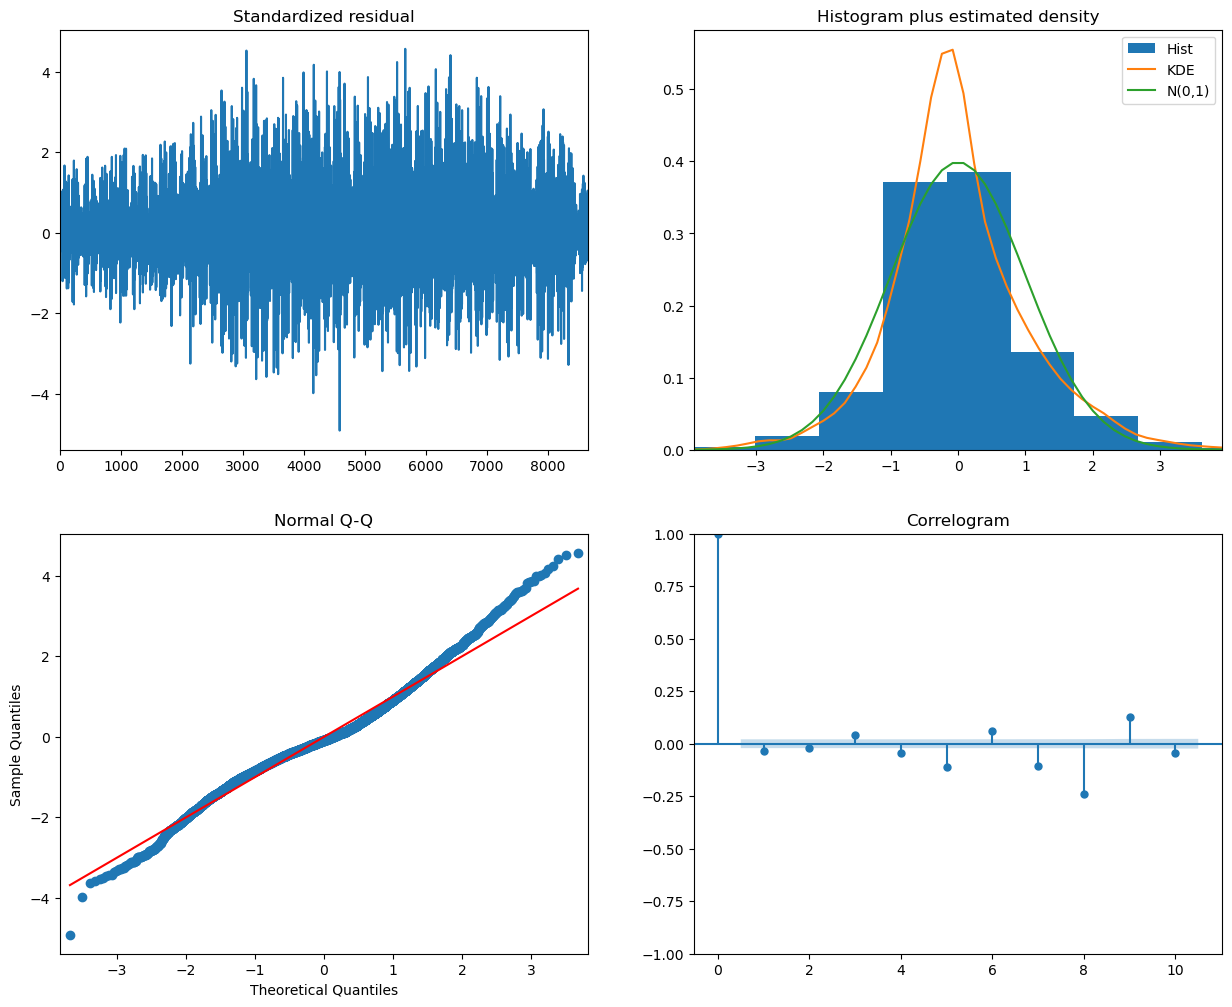

In [66]:
model_autoARIMA.plot_diagnostics(figsize=(15,12))
plt.show()

**Gestandaardiseerde Residuen**:
Interpretatie: De gestandaardiseerde residuen vertegenwoordigen de fouten van het model na aanpassing. Ze zouden willekeurig verdeeld moeten zijn rond nul, zonder duidelijke patronen. Als er systematische patronen zichtbaar zijn, kan dit aangeven dat het model bepaalde informatie niet goed vastlegt.

**Histogram plus Geschatte Dichtheid**:
Interpretatie: Dit diagram vergelijkt de verdeling van de gestandaardiseerde residuen met een ideale normale verdeling. Als de gestandaardiseerde residuen normaal verdeeld zijn, zou het histogram een soortgelijke vorm moeten hebben als de geschatte dichtheid. Afwijkingen kunnen wijzen op niet-normale fouten.

**Normale Q-Q Plot (Quantile-Quantile Plot)**:
Interpretatie: Een normale Q-Q plot vergelijkt de kwantielen van de gestandaardiseerde residuen met de kwantielen van een ideale normale verdeling. Als de punten op een rechte lijn vallen, suggereert dit normale verdeling van de residuen. Afwijkingen van de rechte lijn kunnen wijzen op niet-normale residuen.

**Corellogram (ACF-plot)**:
Interpretatie: De autocorrelatiefunctie (ACF) meet de correlatie van de residuen met zichzelf op verschillende tijdsafstanden. In een ideale situatie zouden er geen significante correlaties mogen zijn. Als er significante pieken zijn, kan dit wijzen op patroonachtig gedrag in de residuen, wat betekent dat het model mogelijk nog steeds informatie mist. (Artley, 2022)

## PROPHET

**PROPHET** is een open-source tool van Facebook die wordt gebruikt voor het voorspellen van tijdreeksgegevens, wat bedrijven helpt de markt te begrijpen en mogelijk te voorspellen. Het is gebaseerd op een ontbindbaar additief model waarbij niet-lineaire trends passen bij seizoensgebondenheid. Het houdt ook rekening met de effecten van feestdagen.
(“Diagnostics”, 2023)

Tijdens een huur-voorspellingsproject met Prophet hebben we nauwkeurig gekeken naar de tijdlijngegevens. Prophet kan deze gegevens handig opdelen in verschillende delen, zoals een flexibele trend, de normale ups en downs die regelmatig gebeuren (seizoensgebondenheid), en het effect van specifieke feestdagen. Prophet gebruikt een slimme methode genaamd Bayesian om dingen te begrijpen, wat ons voorspellingen geeft met een maatstaf voor hoe zeker we kunnen zijn over die voorspellingen. Bovendien merkt Prophet automatisch rare punten op in de gegevens, waardoor onze voorspellingen betrouwbaar blijven. 

Een groot voordeel ten opzichte van **autoregressieve modellen** (bijv. ARIMA) is dat Prophet geen stationaire tijdreeksen vereist: er wordt van nature een trendcomponent gegenereerd.

Om deze redenen werkt Prophet vrij goed voor voorspellingen op middellange termijn ook al is het betrouwbaarheidsinterval vrij groot.

De trend kan correct worden geschat zonder externe gegevens (zoals het aantal klanten). Dit is behoorlijk krachtig, want wanneer je oproepaantallen voorspelt, weet je niet hoeveel klanten je over 5 maanden zult hebben, dus je kunt deze functie niet gebruiken. (Artefact, 2023)

In [67]:
from prophet import Prophet

prophet = prophet.rename(columns={'date_hour': 'ds', 'cnt': 'y'})
prophet.head()

,ds,holiday,weathersit,temp,atemp,hum,windspeed,y,year,month,day,hour,season
0,2011-01-01 00:00:00,Not Holiday,Clear,0.24,0.2879,0.81,0.0896,16,2011,January,Saturday,0,Winter
1,2011-01-01 01:00:00,Not Holiday,Clear,0.22,0.2727,0.80,0.0896,40,2011,January,Saturday,1,Winter
2,2011-01-01 02:00:00,Not Holiday,Clear,0.22,0.2727,0.80,0.0896,32,2011,January,Saturday,2,Winter
3,2011-01-01 03:00:00,Not Holiday,Clear,0.24,0.2879,0.75,0.0896,13,2011,January,Saturday,3,Winter
4,2011-01-01 04:00:00,Not Holiday,Clear,0.24,0.2879,0.75,0.0896,1,2011,January,Saturday,4,Winter


In [68]:
m = Prophet()
m.fit(prophet)

23:40:28 - cmdstanpy - INFO - Chain [1] start processing
23:40:29 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
future = m.make_future_dataframe(periods=365)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
16997,2013-11-26 23:00:00,-11.536800,-388.787055,374.761532
16998,2013-11-27 23:00:00,-10.902588,-401.301422,381.276023
16999,2013-11-28 23:00:00,-4.773030,-380.064598,364.332001
17000,2013-11-29 23:00:00,-7.224663,-354.518379,345.777616
17001,2013-11-30 23:00:00,-12.405600,-390.065579,341.489785


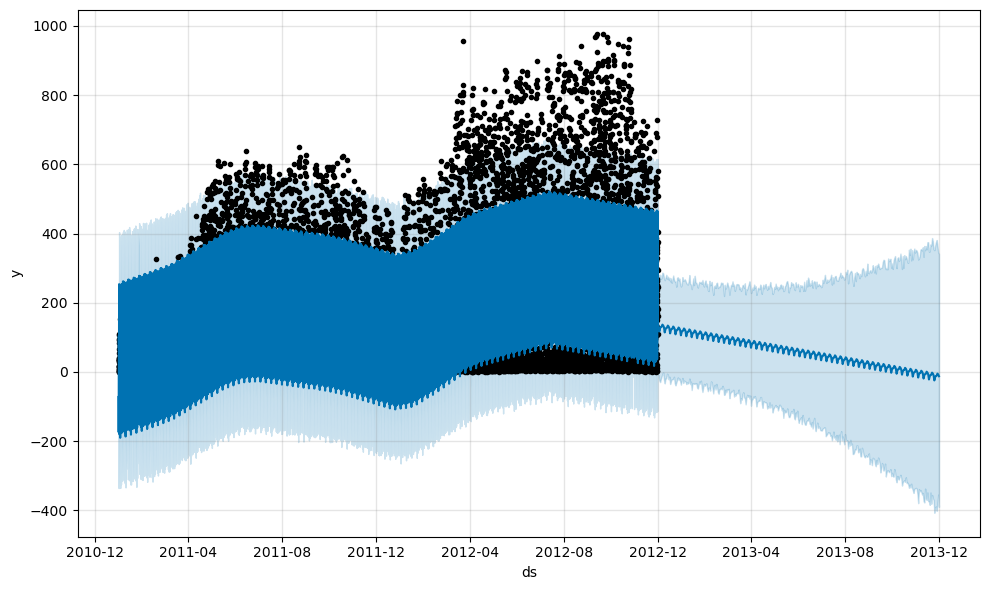

In [70]:
fig1 = m.plot(forecast)

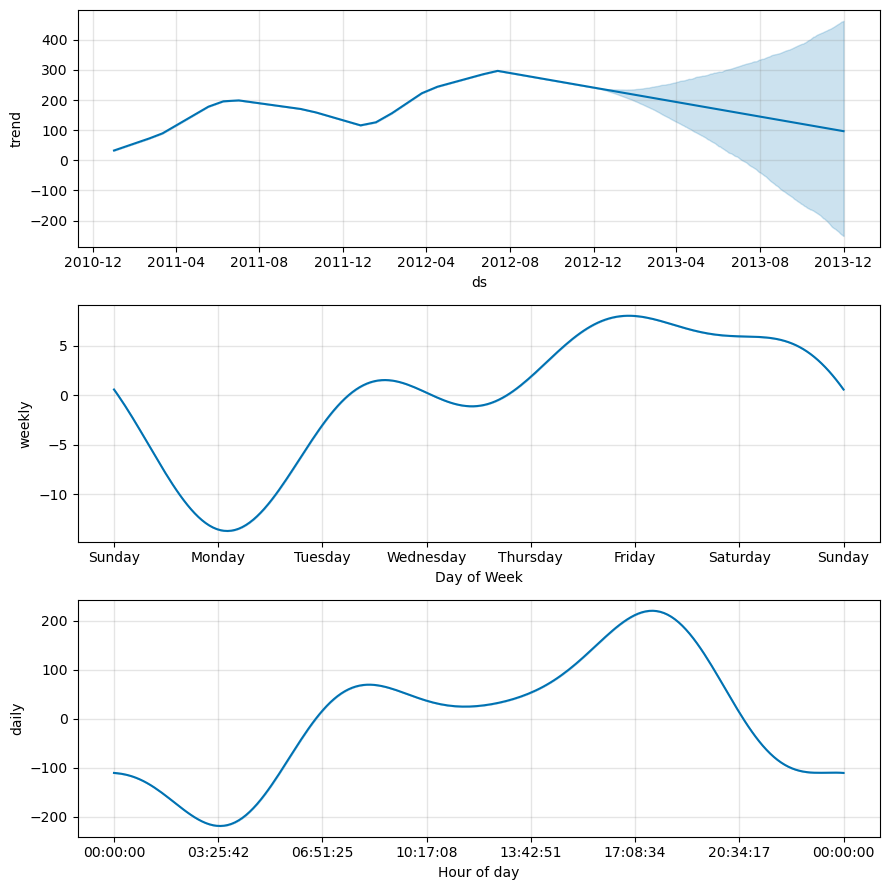

In [71]:
fig2 = m.plot_components(forecast)


In [72]:
pred = forecast['yhat'].tail(500).reset_index(drop=True)

# Bekijken van de RMSE
rmse = np.sqrt(mean_squared_error(count[-500:], pred)) 
print(f'RMSE: {rmse}')

RMSE: 220.85653763149188


## Hybride modellen

Dit hybride model met residuals combineert twee verschillende modellen om de voorspelling van het verhuurgedrag van een product in de toekomst te verbeteren. Hier is een uitleg van hoe het model werkt en waarom het effectief zou kunnen zijn:

1. **Eerste Model (XGBoost):**
   - Het eerste model is een XGBoost regressor. XGBoost is een krachtig ensemble-algoritme gebaseerd op decision trees dat goed presteert in veel voorspellingsproblemen.
   - Het XGBoost-model wordt getraind op historische gegevens (X_train en y_train) om het verhuurgedrag te voorspellen.

2. **Residuals (Restwaarden):**
   - Nadat het XGBoost-model is getraind, worden voorspellingen gedaan op een testset (X_test).
   - De residuals worden berekend door het verschil te nemen tussen de werkelijke waarden (y_test) en de voorspelde waarden door het XGBoost-model. Dit zijn de fouten die het eerste model heeft gemaakt.

3. **Tweede Model (Lineaire Regressie op Residuals):**
   - Een tweede model, een eenvoudige lineaire regressie, wordt getraind op dezelfde testset, maar dit keer met de residuals als het doelvariabele (y). Dit model leert dus de patronen in de fouten die het XGBoost-model heeft gemaakt.

4. **Hybride Voorspellingen:**
   - Nadat het tweede model is getraind, worden voorspellingen gedaan op dezelfde testset. Deze voorspellingen op residuals worden vervolgens toegevoegd aan de oorspronkelijke voorspellingen van het XGBoost-model.
   - Het idee hierachter is dat het tweede model de fouten van het eerste model corrigeert. Door deze correcties toe te voegen aan de oorspronkelijke voorspellingen, proberen we een meer nauwkeurige schatting te krijgen.

**Waarom zou dit een goed model kunnen zijn voor het voorspellen van verhuur in de toekomst?**

1. **Combinatie van Sterke Punten:**
   - XGBoost staat bekend om zijn vermogen om complexe relaties in gegevens te modelleren, terwijl lineaire regressie goed kan zijn in het modelleren van resterende fouten of patronen in de residuals.
   - Door deze twee modellen te combineren, hopen we de sterke punten van beide benaderingen te benutten.

2. **Robuustheid tegen Fouten:**
   - Het tweede model (lineaire regressie op residuals) fungeert als een soort correctiemodel voor de fouten van het eerste model. Het maakt het hybride model robuuster tegen mogelijke fouten of tekortkomingen van het XGBoost-model.

3. **Flexibiliteit:**
   - De hybride benadering met residuals biedt enige flexibiliteit. Als er patronen zijn die het XGBoost-model niet kan vastleggen, kan het tweede model helpen deze aan te vullen.

In [73]:
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train, y_train)

# Make predictions using the primary model
y_pred_xgboost = xgboost_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred_xgboost

# Create a secondary model (Linear Regression) on residuals
linear_model_residuals = LinearRegression()
linear_model_residuals.fit(X_test, residuals)

# Make predictions using the secondary model on residuals
residual_predictions = linear_model_residuals.predict(X_test)

# Combine predictions from the primary model and the secondary model
hybrid_predictions = y_pred_xgboost + residual_predictions

# Calculate RMSE for the hybrid model
rmse_hybrid = np.sqrt(mean_squared_error(y_test, hybrid_predictions))
print(f'Root Mean Squared Error (RMSE) for Hybrid Model: {rmse_hybrid}')

Root Mean Squared Error (RMSE) for Hybrid Model: 41.439993784322944


## Opdracht 3: Bevindingen

**Linear Regression** = 136.61346046179236

**Ridge Regression** = 136.52885780439715

**Lasso Regressing**= 136.50379304980456

**Random Forest**= 43.530961961073245

**Gradient Boosting Ensemble**= 38.089605

**PROPHET** = 220.85653763149188

**Hybrid model** = 41.439993784322944

Het ensemble model verricht het beste. Dit is een ensemble model dat gebruikt maakt van Voting tussen een LGBM Regressor en een XGB Regressor. De parameters van beide zijn:

LGBMRegressor(n_estimators=600,
                   max_depth=6,
                   learning_rate=0.1)
en

XGBRegressor(n_estimators=700,
                  max_depth=7,
                  learning_rate=0.05)

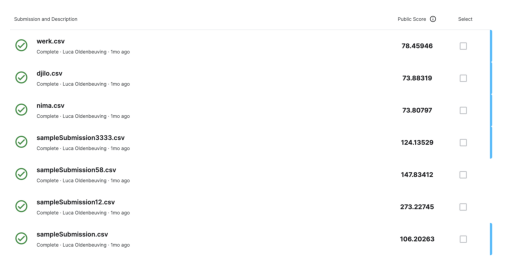

In [74]:
from PIL import Image
import matplotlib.pyplot as plt

images = ["kaggle"]
for image in images:
# Provide the path to your image file
    image_path = image

# Open the image using Pillow
    image = Image.open(image_path)

# Display the image
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

## Opdracht 4: Conclusie en aanbevelingen



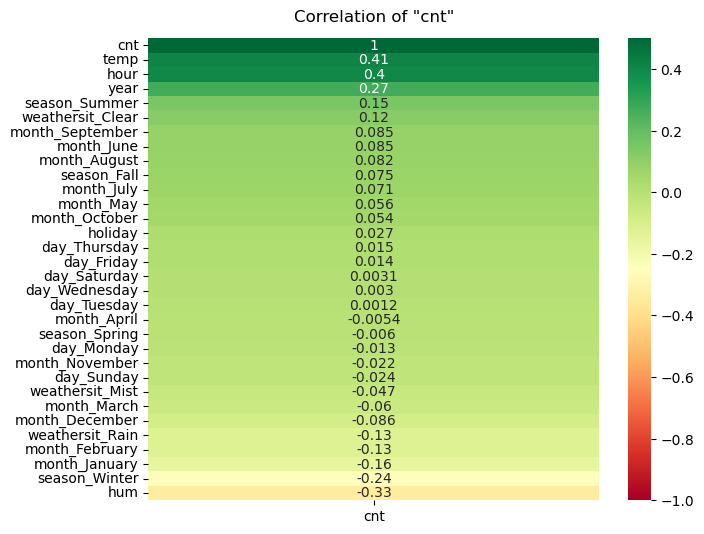

In [75]:
plt.figure(figsize=(16, 6))

# Create subplot
plt.subplot(121)

# Generate heatmap for correlation
heatmap1 = sns.heatmap(train.corr(method='pearson')[['cnt']].sort_values(by='cnt', ascending=False),
                       vmin=-1, vmax=0.5, annot=True, cmap='RdYlGn')

# Set title and formatting for the first subplot
heatmap1.set_title('Correlation of "cnt"', fontdict={'fontsize': 12}, pad=12)

# Display the plot
plt.show()

Bepaal welke features het meeste invloed hebben op je voorspellingen:

De features met de meeste invloed zijn temperatuur, uur, jaar en seizoen. Dit sluit erg aan op onze EDA aangezien we er hier achterkwamen dat temperatuur de hoogste invloed had op verhuur. Ook zagen we dat er in de zomer meer verhuurd was dan in de winter. 

Ons advies is daarom meer te focussen op koudere periodes. Hier is namelijk veel winst in te behalen, aangezien er weinig verhuurd wordt in de Winter. Maak een aanpassing op de product/dienst dat het zelfs in de koude temperaturen goed te gebruiken is.

Denk erover na om functies toe te voegen die je product in de winter aantrekkelijker maken. Bijvoorbeeld, als het gaat om buitengebruik, overweeg dan het toevoegen van isolatie of andere kenmerken die het bruikbaar maken in koudere omstandigheden. Dit kan niet alleen de verhuur stimuleren tijdens de wintermaanden, maar het kan ook een onderscheidende factor worden ten opzichte van concurrenten.

Aangezien onze tijd serie data totaal niet stationair is, raden wij 1 van de twee tijd serie modellen aan. Dit kan zijn de SARIMA(X) of de Prophet. Bij beide is de RMSE echter vrij hoog, waar de Prophet iets beter voorspelt. Aangezien we de toekomst voorspellen is dit moeilijk voor een lineair model. Wij raden het Prophet model aan van Facebook. 

# Bronvermelding

Artefact. (2023, 20 januari). Is Facebook Prophet suited for doing good predictions in a real-world project? - Artefact. https://www.artefact.com/nl/blog/is-facebook-prophet-suited-for-doing-good-predictions-in-a-real-world-project/ 

Artley, B. (2022, 27 juni). Time series forecasting with ARIMA , SARIMA and SARIMAX. Medium. https://towardsdatascience.com/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6 

Augmented Dickey-Fuller test - MATLAB Adftest. (z.d.). https://www.mathworks.com/help/econ/adftest.html;jsessionid=d60d14350ed52a6f72316ff1139e 

Barretto, D. P. (2022, 6 april). Time Series Part 2: Forecasting with SARIMAX Models: An Intro - JADS MKB Datalab. JADS MKB Datalab. https://www.jadsmkbdatalab.nl/forecasting-with-sarimax-models/ 

Diagnostics. (2023, 18 oktober). Prophet. https://facebook.github.io/prophet/docs/diagnostics.html 

Log in or sign up to view. (z.d.). https://research.facebook.com/blog/2017/2/prophet-forecasting-at-scale/ 

Wavetech. (z.d.). How-to-Check-if-Time-Series-Data-is-Stationary-with-Python/README.md at Master · 2wavetech/How-to-Check-if-Time-Series-Data-is-Stationary-with-Python. GitHub. https://github.com/2wavetech/How-to-Check-if-Time-Series-Data-is-Stationary-with-Python/blob/master/README.md

Great Learning Team. (2023, 30 mei). An introduction to GridSearchCV | What is Grid Search | Great Learning. Great Learning Blog: Free Resources what Matters to shape your Career! https://www.mygreatlearning.com/blog/gridsearchcv/

GeeksforGeeks. (2023). Gradient boosting in ML. GeeksforGeeks. https://www.geeksforgeeks.org/ml-gradient-boosting/

(ChatGPT, 2023, prompt 1: Gradient Boosting vs Tree Models.https://chat.openai.com/share/b15ebf3c-160c-4426-8927-8ad75e32db78

Gaurav. (2022). An introduction to gradient boosting decision trees. Machine Learning Plus. https://www.machinelearningplus.com/machine-learning/an-introduction-to-gradient-boosting-decision-trees/

Yiu, T. (2021, 10 december). Understanding random Forest - towards data science. Medium. https://towardsdatascience.com/understanding-random-forest-58381e0602d2

Donges, N. (2021). Random Forest: A complete guide for machine learning. Built In. https://builtin.com/data-science/random-forest-algorithm

GeeksforGeeks. (2023, 23 mei). LightGBM Light Gradient Boosting Machine. https://www.geeksforgeeks.org/lightgbm-light-gradient-boosting-machine/ Great Learning Team. (2022, 16 november). 

Ridge Regression Definition & Examples | What is ridge regression? Great Learning Blog: Free Resources what Matters to shape your Career! https://www.mygreatlearning.com/blog/what-is-ridge-regression/ 

Python: Datetime to Season. (z.d.). Stack Overflow. https://stackoverflow.com/questions/44124436/python-datetime-to-season 

Understanding Moving Averages - CME Group. (z.d.). https://www.cmegroup.com/education/courses/technical-analysis/understanding-moving-averages.html 

What is linear regression? - Linear regression explained - AWS. (z.d.). Amazon Web Services, Inc. https://aws.amazon.com/what-is/linear-regression/#:~:text=Linear%20regression%20is%20a%20data,variable%20as%20a%20linear%20equation.